# HW2: How did these men win the elections?

<img width=600 height=300 src="http://i.huffpost.com/gen/613496/images/o-BOEHNER-MCCONNELL-facebook.jpg"/>


In HW1, we scraped music data from Wikipedia and Billboard, and did some exploratory data analysis on this data. We saw how to construct features that might lead to reasonable predictions. Let's put those modeling skills to practice.

This assignment is about working with election data for prediction. To this end, our main focus will be to implement and evaluate a number of sophisticated forecasting techniques.

This was the [XKCD comic](http://xkcd.com/1131/) after the 2012 Presidential election:

<img width=600 height=300 src="http://imgs.xkcd.com/comics/math.png"/>


The comic refers to the fact that Nate Silver's statistical model (which is based on combining information from pre-election polls with fundamentals information about the voting public such as income and partisanship) correctly predicted the outcome of the 2012 presidential race in all 50 states.

We are going to focus on the 2014 Senate election. Polling data isn't a perfect predictor for the future, and some polls are more accurate than others. This means that election forecasters must consider prediction uncertainty when building models. We shall first use polling data as _samples_ of the _population_ value of a contestants vote for a senate seat. Secondly, historical elections of the house will also be used as examples of building _fundamentals models_. We shall use explanatory regressions on house data to see what impact incumbency has on election results. Finally we shall construct a simple _fundamentals_ model as a way of _regularizing_ results from our samples of elections for some senate seats, and see if they improve predictions. You will then write a short piece, while pretending to be a journalist (unless you are one), about the process of constructing your senate model and the results that were obtained from it.

The aims of this assignment are:

- To practice data manipulation with Pandas
- To develop intuition about sampling and bias when making predictions
- To understand how to use regression for explanation
- To better understand how election forecasts are constructed, especially the inputting of other information (e.g. demographic)
- learning how to combine various models
- learning how to write about your analysis.

The data for our analysis will come from demographic and polling data. 

We will **simulate building our model on NOV 2nd 2014** -- approximately two days before the election, so that we can check our predictions against actual results.



##This homework is due Thursday, October 8th, at 11:59PM EST.

We'll grade the last commit you make before the homework deadline, which is 11:59PM, Thursday, October 8th. We will be looking for the files `hw2.ipynb` AND `article.md`.

#Table of Contents
* [HW2: How did these men win the elections?](#HW2:-How-did-these-men-win-the-elections?)
	* [The US electoral system](#The-US-electoral-system)
	* [Q1 Predicting Elections from Samples](#Q1-Predicting-Elections-from-Samples)
		* [Obtaining and cleaning the data](#Obtaining-and-cleaning-the-data)
			* [1.1 Use python's requests module to download all the data associated with this topic.](#1.1-Use-python's-requests-module-to-download-all-the-data-associated-with-this-topic.)
			* [Let us create a dataframe `multipoll` from the data](#Let-us-create-a-dataframe-multipoll-from-the-data)
			* [1.2 Write code to find the days from "today" to  each poll, and to calculate the Rep/Dem spread.](#1.2-Write-code-to-find-the-days-from-"today"-to--each-poll,-and-to-calculate-the-Rep/Dem-spread.)
		* [Simple Aggregation](#Simple-Aggregation)
			* [1.3 Study the spread by state](#1.3-Study-the-spread-by-state)
			* [1.4 Write a function that uses this predictive model to simulate the outcome of the election given a Dataframe of probabilities.](#1.4-Write-a-function-that-uses-this-predictive-model-to-simulate-the-outcome-of-the-election-given-a-Dataframe-of-probabilities.)
			* [1.5 Checking your predictions against the actual results](#1.5-Checking-your-predictions-against-the-actual-results)
		* [Weighted Aggregation](#Weighted-Aggregation)
			* [1.6 Now create a weighted race average.](#1.6-Now-create-a-weighted-race-average.)
			* [1.7 Plot the results as before for the weighted simulations](#1.7-Plot-the-results-as-before-for-the-weighted-simulations)
		* [Looking deeper into the results](#Looking-deeper-into-the-results)
			* [1.8 Plot the predicted spreads from `joined` for each state](#1.8-Plot-the-predicted-spreads-from-joined-for-each-state)
	* [2. Predicting an election from a previous one: using linear regression to get vote fractions and study the effects of incumbency](#2.-Predicting-an-election-from-a-previous-one:-using-linear-regression-to-get-vote-fractions-and-study-the-effects-of-incumbency)
		* [The State Fundamentals Model](#The-State-Fundamentals-Model)
			* [Data Preparation and Cleaning](#Data-Preparation-and-Cleaning)
			* [Seeing linearity](#Seeing-linearity)
		* [Linear Regression](#Linear-Regression)
			* [Prediction vs Explanation](#Prediction-vs-Explanation)
		* [Interpretable Regressions](#Interpretable-Regressions)
			* [2.1 Explain the coefficient of Incumbency](#2.1-Explain-the-coefficient-of-Incumbency)
			* [2.2 Write a function `ols_regression`  to do such a linear regression for every pair of years](#2.2-Write-a-function-ols_regression--to-do-such-a-linear-regression-for-every-pair-of-years)
			* [2.2 Carry out the linear regression `DP ~ DP1 + I + P` for all the year pairs](#2.2-Carry-out-the-linear-regression-DP-~-DP1-+-I-+-P-for-all-the-year-pairs)
				* [Inference using Bootstrap](#Inference-using-Bootstrap)
			* [2.3 Bootstrap a distribution for the coefficient of I for 1990-1988](#2.3-Bootstrap-a-distribution-for-the-coefficient-of-I-for-1990-1988)
				* [Inference using p-values](#Inference-using-p-values)
			* [2.4 What can we say from thevalues of the incumbency coefficients over time?](#2.4-What-can-we-say-from-thevalues-of-the-incumbency-coefficients-over-time?)
		* [Is the regression complete? Or do we need more features?](#Is-the-regression-complete?-Or-do-we-need-more-features?)
			* [2.5 Carry out the linear regression with an interaction between the previous elections democratic fraction and this elections incumbency, for all the year pairs](#2.5-Carry-out-the-linear-regression-with-an-interaction-between-the-previous-elections-democratic-fraction-and-this-elections-incumbency,-for-all-the-year-pairs)
		* [Further work for later: Causal Models](#Further-work-for-later:-Causal-Models)
	* [Q3. Improving our senate predictions via "state fundamentals"](#Q3.-Improving-our-senate-predictions-via-"state-fundamentals")
		* [Estimating election bias using the house](#Estimating-election-bias-using-the-house)
		* [Incumbency and Partisan-ness](#Incumbency-and-Partisan-ness)
			* [3.1 create new columns in the incumbency data frame `ridf` called  `spread` and `cspread`](#3.1-create-new-columns-in-the-incumbency-data-frame-ridf-called--spread-and-cspread)
			* [Obtain `spread` and `cspread` from the PVI](#Obtain-spread-and-cspread-from-the-PVI)
		* [Incorporating "state fundamentals" as a new poll](#Incorporating-"state-fundamentals"-as-a-new-poll)
			* [3.2 Combine PVI spreads and incumbency spreads into a model](#3.2-Combine-PVI-spreads-and-incumbency-spreads-into-a-model)
			* [We write code which uses the template and the above mapper function to return a dataframe `additional_polls`](#We-write-code-which-uses-the-template-and-the-above-mapper-function-to-return-a-dataframe-additional_polls)
		* [Re-visualize](#Re-visualize)
			* [3.3 Calculate a weighted average, simulate from it, and plot as before where our result lies.](#3.3-Calculate-a-weighted-average,-simulate-from-it,-and-plot-as-before-where-our-result-lies.)
			* [3.4 Now Compare the individual results, just like before](#3.4-Now-Compare-the-individual-results,-just-like-before)
	* [Q4. Write a newspaper article about the senate election](#Q4.-Write-a-newspaper-article-about-the-senate-election)


## The US electoral system

U.S. Senate seats come up for election every 6 years, barring the retirement, death, or appointment to other office of a senator. Not all seats come up every election: the senate seats open are typically split between presidential-election years and mid term elections (2 years after the presidential election and 2 years before the next one). In contrast, elections to the House happen every two years, giving us a wealth of data to understand demographic and other trends. In our analysis of the house, we will not compare data from the "10" years and "12" years, such as 1990 and 1992, as redistricting happens at this time.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Q1 Predicting Elections from Samples

In this question we'll use _samples_ of an election in a state to _predict_ the behavior of the electoral population in the state. The election we will consider, specifically, are the senate elections from 2014.

### Obtaining and cleaning the data

We will use the [**Huffpost Pollster API**](http://elections.huffingtonpost.com/pollster/api) to obtain polls about the 2014 US senate elections. Specifically we will be interested in the _topic_ `2014-senate`. You can read more about _topics_ at the above link. There were 36 seats up for grabs. 

It may help to install a JSON viewer extension to your browser (e.g. for Chrome you can use [JSONView](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0CB0QFjAAahUKEwiGndze6o_IAhXDq4AKHUEIAks&url=https%3A%2F%2Fchrome.google.com%2Fwebstore%2Fdetail%2Fjsonview%2Fchklaanhfefbnpoihckbnefhakgolnmc%3Fhl%3Den&usg=AFQjCNH3ET5JyRh_aKGH_G5Ws5MXENK5bA&sig2=tj_E5YuUZ79ZuNamvz5PHA)) in order to make sense of the JSON file we'll be downloading.

#### 1.1 Use python's requests module to download all the data associated with this topic. 

The data will be in multiple pages, each of which has about 10 JSON dictionaries. (Hint: When we did this, we found there to be 86 pages and a total of 845 JSON dictionaries.) **Leave a second of time between each downloaded page**. Create an array `lpolls` where you store all of 845 dictionaries.

In [2]:
import requests
import time
import json

In [3]:
# your code here
lpolls=[]
lpolls2={}
for i in range(86):
    req=requests.get("http://elections.huffingtonpost.com/pollster/api/polls/?topic=2014-senate&page="+str(i+1))
    lpolls2[i]=req.json()
    lpolls=lpolls+lpolls2[i]
    time.sleep(1)

We'll store the `lpolls` array in JSON form in a file called `senatepolls.json`. **This will come in useful if your notebook session dies: you don't want to re-gather all the data every time you run this.**

In [4]:
fd=open("tempdata/senatepolls.json","w")
json.dump(lpolls, fd)
fd.close()

In [5]:
# If you need to reload you can use this code
# import json
# with open("tempdata/senatepolls.json") as json_file:
#     lpolls = json.load(json_file)
#you might have to add code to get the correct types..

#### Let us create a dataframe `multipoll` from the data

The JSON data from the API has the following keys:

* `start_date`
* `end_date` 
* `pollster`
* `partisan` 
* `affiliation`

In order to organize this, we do several things. First, we combine `partisan` and `affiliation` to create a new `partisan` value. 

Next, there are multiple survey `questions` in each dictionary, **each of which is a separate poll**. We'll grab only the questions that have the `topic` value **`2014-senate`**. For each such question we capture the `name` and `chart`; these identify the specific senate election, and the `state` in which the election will be held. 

We then look at the **subpopulations surveyed** such as `registered voters` and `likely voters`. We'll consider each subpopulation as a **separate poll**. We grab the `name` of the subpopulation as the variable `subpopulation`. We also pick up the number of `observations`, and the margin of error `moe` (from `margin_of_error`). 

From the responses we pick up under **`r`** the number of republican votes, under **`d`** the number of democratic votes, and under `incumbent` whether the democratic or republican candidate is an incumbent.

In [6]:
polldicts=[]
for p in lpolls:
    d={}
    d['start_date']=p['start_date']
    d['end_date']=p['end_date']
    d['pollster']=p['pollster']
    d['partisan']=p['partisan']+"/"+p['affiliation']
    for q in p['questions']:
        if q['topic']=="2014-senate":
            d2=d.copy()
            d2['name']=q['name']
            d2['chart']=q['chart']
            d2['state']=q['state']
            for s in q['subpopulations']:
                d3=d2.copy()
                d3['subpopulation']=s['name']
                d3['observations']=s['observations']
                d3['moe']=s['margin_of_error']
                d3['incumbent']="I"
                d3['r']=0.0
                d3['d']=0.0
                for r in s['responses']:
                    if r['party']=='Rep':
                        d3['r']=r['value']
                        if r['incumbent']==True:
                            d3['incumbent']='r'
                    if r['party']=='Dem':
                        d3['d']=r['value']
                        if r['incumbent']==True:
                            d3['incumbent']='d'
                polldicts.append(d3)                

This is what we end up with.

In [7]:
multipoll=pd.DataFrame(polldicts)
multipoll.head(2)

,chart,d,end_date,incumbent,moe,name,observations,partisan,pollster,r,start_date,state,subpopulation
0,2014-louisiana-senate-cassidy-vs-landrieu,40,2014-12-04,d,3.0,2014 Louisiana Senate: Cassidy vs. Landrieu,1000,Nonpartisan/None,Rasmussen,56,2014-12-02,LA,Likely Voters
1,2014-louisiana-senate-cassidy-vs-landrieu,33,2014-11-25,d,4.4,2014 Louisiana Senate: Cassidy vs. Landrieu,500,Sponsor/Rep,Wilson Perkins Allen Opinion Research (R-Indep...,57,2014-11-24,LA,Likely Voters


We chose to **remove some races** because they involve polling for candidates who ultimately dropped out.

There were some peculiarities in this senate election. You can see the results [here](http://elections.huffingtonpost.com/2014/results). Firstly, note that in Kansas, the democratic candidate Taylor withdrew in favor of an independent, Greg Orman, who was likely to caucus with the democrats. We shall treat him as a Democrat. 

Secondly note that Louisiana has a "open primary." If no candidate gets more than 50 percent of the votes, the top two candidates will move on to a runoff on Dec. 6. Indeed this did not happen and a runoff on Dec 6th had the democratic candidate Mary Landrieu lose even though she won the primary by a tight margin. We shall pretend here that she won. There was also a second republican candidate who thus split the vote for the republicans -- we ignore this. 

In Alabama the Republican senator won unopposed. We shall remove this race from our consideration, bringing the total number of elections to 35. In all seats we ignore third party vote percentages even if they were significant, except in the case of Greg Orman.

**Important sidebar**: there will be irregularities in most large datasets you'll encounter. In this case we made subjective decisions on how to handle these cases. Disclosing this is an important part of an analysis. 

In [8]:
remove=[u'2014-alaska-senate-miller-vs-begich',
 u'2014-alaska-senate-treadwell-vs-begich',
 u'2014-georgia-senate-broun-vs-nunn',
 u'2014-georgia-senate-gingrey-vs-nunn',
 u'2014-georgia-senate-handel-vs-nunn',
 u'2014-georgia-senate-kingston-vs-nunn',
 u'2014-georgia-senate-runoff',
u'2014-iowa-senate-clovis-vs-braley',
 u'2014-iowa-senate-jacobs-vs-braley',
 u'2014-iowa-senate-whitaker-vs-braley',
u'2014-kansas-senate-roberts-vs-orman-vs-taylor',
 u'2014-kansas-senate-wolf-vs-taylor',
u'2014-kentucky-senate-bevin-vs-grimes',
 u'2014-kentucky-senate-mcconnell-vs-judd',
u'2014-mississippi-senate-cochran-vs-childers',
 u'2014-new-hampshire-senate-bass-vs-shaheen',
 u'2014-north-carolina-senate-brannon-vs-hagan',
 u'2014-oregon-senate-conger-vs-merkley']

In [9]:
mask = [i not in remove for i in multipoll.chart]

In [10]:
multipoll=multipoll[mask]

#### 1.2 Write code to find the days from "today" to  each poll, and to calculate the Rep/Dem spread.

Recall, that in this exercise "today" is **November 2nd, 2014**.

Assume that the poll date is exactly in-between the start-date and end-date. We provide some code for pandas parsing of dates below.

In [11]:
import datetime
today = datetime.datetime(2014, 11, 2)
print today
multipoll.start_date = multipoll.start_date.apply(pd.datetools.parse)
multipoll.end_date = multipoll.end_date.apply(pd.datetools.parse)

2014-11-02 00:00:00


Add a column `poll_date` to `multipoll` that gets the poll date (in between the start and end date of the poll). Also add a column `age_days` which calculates the number of days back from now to the poll. Filter `multipoll` to include only the polls before today. Finally calculate a column `spread` in `multipoll` which is the difference between the republican percentage and the democratic percentage. So if the Republicans are leading in a poll by 5 percentage points, the `spread` should be 5.

Reading the cs109 elections homework, from 2 years back (see http://nbviewer.ipython.org/github/cs109/content/blob/master/HW2_solutions.ipynb ) will help you immensely with this part of the homework.

In [12]:
#your code here
multipoll['poll_date'] = multipoll.start_date + (multipoll.end_date - multipoll.start_date).values / 2      

#compute the poll age relative to Nov 1, in days
multipoll['age_days'] = (today - multipoll['poll_date']).values / np.timedelta64(1, 'D')
multipoll = multipoll[multipoll.age_days > 0]
multipoll['spread']=multipoll.r - multipoll.d

Lets see what `multipoll` now looks like. It should have 16 columns if you did this right.

In [13]:
len(multipoll.columns)

16

In [14]:
multipoll.head(2)

,chart,d,end_date,incumbent,moe,name,observations,partisan,pollster,r,start_date,state,subpopulation,poll_date,age_days,spread
11,2014-georgia-senate-perdue-vs-nunn,45,2014-11-02,I,2.6,2014 Georgia Senate: Perdue vs. Nunn,1463,Nonpartisan/None,InsiderAdvantage/Fox 5 Atlanta/Morris News Ser...,48,2014-10-30,GA,Likely Voters,2014-10-31 12:00:00,1.5,3
13,2014-georgia-senate-perdue-vs-nunn,44,2014-11-02,I,4.1,2014 Georgia Senate: Perdue vs. Nunn,591,Nonpartisan/None,SurveyUSA/11Alive,47,2014-10-30,GA,Likely Voters,2014-10-31 12:00:00,1.5,3


Let's remove the polls for which the margin of error is not known, and get a rough idea of the average margin of error when compared to the spread.

In [15]:
multipoll=multipoll[multipoll.moe.notnull()]


In [16]:
multipoll.moe.mean(), np.sqrt(np.mean(multipoll.spread**2))

(3.7998455598455627, 13.463951584805713)

Pollsters calculate the MOE for us based on many considerations, but note that you can yourself estimate MOE by using Binomial Sampling Error (http://onlinestatbook.com/2/sampling_distributions/samp_dist_p.html)

There were two races in Oklahoma and South Carolina. We label the state for the second of these races as `OK2` and `SC2`.

In [17]:
multipoll.loc[multipoll.chart=='2014-oklahoma-senate-lankford-vs-johnson','state']='OK2'

In [18]:
multipoll.loc[multipoll.chart=='2014-south-carolina-senate-scott-vs-dickerson','state']='SC2'

In [19]:
multipoll.head(2)

,chart,d,end_date,incumbent,moe,name,observations,partisan,pollster,r,start_date,state,subpopulation,poll_date,age_days,spread
11,2014-georgia-senate-perdue-vs-nunn,45,2014-11-02,I,2.6,2014 Georgia Senate: Perdue vs. Nunn,1463,Nonpartisan/None,InsiderAdvantage/Fox 5 Atlanta/Morris News Ser...,48,2014-10-30,GA,Likely Voters,2014-10-31 12:00:00,1.5,3
13,2014-georgia-senate-perdue-vs-nunn,44,2014-11-02,I,4.1,2014 Georgia Senate: Perdue vs. Nunn,591,Nonpartisan/None,SurveyUSA/11Alive,47,2014-10-30,GA,Likely Voters,2014-10-31 12:00:00,1.5,3


Now that our data in  `multipoll` looks like it's in pretty good shape, we can move on to make predictions. You may want to save the dataframe to a csv file so you have it handy when needed....

### Simple Aggregation

The idea we'll use for making prediction is very simple: bringing homogeneous information about the election together. This is done by aggregating different polling results.

This approach -- used as a first-pass by the professional poll analysts -- involves combining many polls about the election itself. One advantage of this approach is that it *ostensibly* addresses the problem of bias in individual polls. If we assume that the polls are all attempting to estimate the same quantity, we can increase the accuracy of this estimate by averaging many polls.  In reality though, pollsters also try to correct for known biases, and weight polls based on trustworthiness. We'll do the latter in the following section.

#### 1.3 Study the spread by state

Using this data, compute a new data frame that contains the average of `spread` for each state. Also compute the standard deviation of the spread in each state as well as the number of polls. Use sample standard deviation as defined in pandas rather than `numpy` `np.std`. (The former uses N-1 in the denominator, the latter N).

Define a function `race_average` which returns this data frame. The exact signature of the function is in the cell below.

**Hint**: [`pd.GroupBy`](http://pandas.pydata.org/pandas-docs/stable/groupby.html) could come in handy.

Note here that we can now refer to race by the `state` column in the data frame, since we encoded the second races in `SC` and `OK` as `SC2` and `OK2` respectively.

In [20]:
"""
Function
--------
race_average

Inputs
------
multipoll : DataFrame
   The multipoll data above
   
Returns
-------
  A dataframe, indexed by State, with the following columns:
     N: Number of polls averaged together
     poll_mean: The average value for spread for all polls in this state
     poll_std: The standard deviation of spread
     state: the state in question. This is the same state as the index of this dataframe.
     
Notes
-----
For states where poll_std isn't finite (because N is 1), estimate the
poll_std value as .05 * poll_mean
"""
#your code here
def race_average(multipoll):
    race = multipoll.groupby('state')
    n = race.size()
    s = race.spread.mean()
    st = race.spread.std()
    st[st.isnull()] = .05 * s[st.isnull()]
    state=[e[0] for e in race.state.unique()]
    return pd.DataFrame(dict(N=n, poll_mean=s, poll_std=st, state=state))

Lets call the function on the `multipoll` data frame.

In [21]:
simple=race_average(multipoll)
simple

,N,poll_mean,poll_std,state
state,,,,
AK,29,-0.068966,5.830529,AK
AR,56,1.553571,5.077292,AR
CO,49,0.693878,3.943370,CO
DE,4,-15.500000,2.081666,DE
GA,46,1.913043,4.135623,GA
HI,8,-40.375000,10.487237,HI
IA,47,-0.361702,4.474204,IA
ID,6,29.833333,7.082843,ID
IL,15,-12.400000,4.102264,IL


Let's build an `aggregated_poll_model` function that takes the average data frame as input, and returns a forecast data frame. We assume that the probability that a republican wins a state is given by the probability that a draw from a [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution) with $\mu$=poll_mean and $\sigma$=poll_std being positive. See the Gallup prediction model in the homework from two years back or the same in Lab 3 to get an idea for how this works.

Of course, this is assuming that the distribution of the spread is bell-shaped (i.e. Normally distributed). There may be reason to believe this, but just keep in mind that this is in fact a modeling assumption. 

In [22]:
from scipy.special import erf
def aggregated_poll_model(polls):
    sigma = polls.poll_std
    prob =  .5 * (1 + erf(polls.poll_mean / np.sqrt(2 * sigma ** 2)))
    return pd.DataFrame(dict(rprob=prob, poll_size=polls.N, state=polls.state))


This forecast data frame has the probability of a republican win stored in the `rprob` column. The `poll_size` column contains the number of polls in the state. The state column carries the two-letter label of the state. Lets run this `aggregated_poll_model` on the `simple` frame to output a `simpleprobs` frame:

In [23]:
simpleprobs=aggregated_poll_model(simple)
simpleprobs.head()

,poll_size,rprob,state
state,,,
AK,29,4.952813e-01,AK
AR,56,6.201917e-01,AR
CO,49,5.698375e-01,CO
DE,4,4.807266e-14,DE
GA,46,6.781661e-01,GA


#### 1.4 Write a function that uses this predictive model to simulate the outcome of the election given a Dataframe of probabilities.

We will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Republican is given by the data frame of state-wise win probabilities `rprob`. Thus the result is a [Monte Carlo simulation](https://en.wikipedia.org/wiki/Monte_Carlo_method) (done `n_sim` times) for each probability.

See the predictwise example in Lab 3 for help. Write a function `simulate_election` to do this. Its signature is given below.

In [24]:
"""
Function
--------
simulate_election

Inputs
------
model : DataFrame
    A DataFrame summarizing an election forecast. 
    It has at-least the following columns:
       rprob : Forecasted probability that Republicans win the senate seat in  the state
       poll_size : Num polls for the state
    The DataFrame is indexed by state (i.e., model.index is an array of state names)
    
n_sim : int
   Number of simulations to run
   
Returns 2 things in the form a,b
---------------------------------
a: for each simulation calculate how many seats the republicans win. return this distribution, i.e.
an array of n_sim numbers
b: A dataframe with one column for the state and one column the mean percentage 
of these simulations in which the republicans win   
"""

#Your code here
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(model.shape[0], n_sim))
    repub_votes = (simulations < model.rprob.values.reshape(-1, 1))
    distrib = repub_votes.sum(axis=0)
    return distrib, pd.DataFrame(dict(state=model.state, percent=100*repub_votes.mean(axis=1)))

Run the simulation 10,000 times for `simpleprobs`:

In [25]:
simpledistrib, simple_simelec = simulate_election(simpleprobs, 10000)

If you did this correctly, the model should predict a mode of 20 senate seats for the republicans. Note that because this is a probabilistic forecast: most of the mass is between 18 and 22 seats, but with non-zero probability outside that range.

Lets now read in a data frame of actual results from `senate-results.csv`, so that we can compare our predictions with the results. There are lots of columns here, but for now lets focus on `winrepub` which gives us whether the republicans won that seat or not.

In [26]:
resudf=pd.read_csv("./data/senate-results.csv")
resudf.head()

,d_candidate,d_incumbent,d_pct,d_votes,o_candidate,o_incumbent,o_pct,o_votes,other,r_candidate,r_incumbent,r_pct,r_votes,state,status,winner,winrepub,spread
0,Mark Pryor,True,39.5%,"332,669",NaN,NaN,NaN,NaN,0,Tom Cotton,False,56.5%,"476,309",AR,ok,gop,1,17.0
1,Mark Udall,True,46.0%,"916,245",NaN,NaN,NaN,NaN,0,Cory Gardner,False,48.5%,"965,974",CO,ok,gop,1,2.5
2,Michelle Nunn,False,45.1%,"1,154,388",Amanda Swafford,False,1.9%,"48,930",lib,David Perdue,False,53.0%,"1,355,392",GA,ok,gop,1,7.9
3,Bruce Braley,False,43.7%,"491,708",NaN,NaN,NaN,NaN,0,Joni Ernst,False,52.2%,"586,921",IA,ok,gop,1,8.5
4,NaN,NaN,NaN,NaN,Greg Orman,False,42.5%,"358,898",ind,Pat Roberts,True,53.3%,"449,974",KS,ok,gop,1,10.8


**Note**: `resudf` does not contain `AL` as there was no competitor there.

#### 1.5 Checking your predictions against the actual results

In [27]:
rwinresults=resudf.winrepub.sum()
rwinresults

23

Now comes the moment of truth, how well does our Monte Carlo simulation stack up against the truth?

To answer this, plot the distribution of senate seats the republicans won in your simulation  `simpledistrib`. Contrast it to  the actual result `rwinresults` calculated above. Use a histogram for the distribution, and `axvline` to plot the actual result.

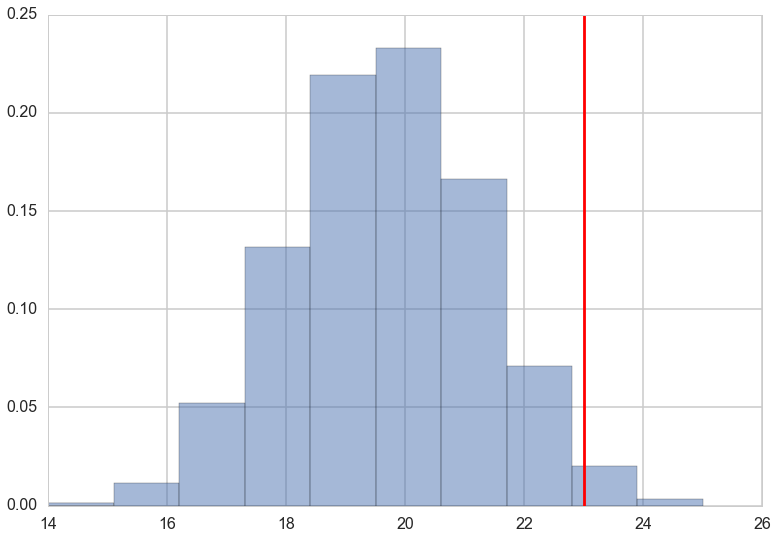

In [28]:
#your code here
plt.hist(simpledistrib, alpha=0.5, normed=True);
plt.axvline(rwinresults, color='r')

Compare the mode prediction with the actual result. Did you do well?

*your answer here*

The actual number of seats won by republicans was 23, our mode prediction was 20. These two numbers are not very different, but our predictions were fairly confident. What I mean is that our simulations rarely chose the republicans to win more than 22, let alone 23 seats. So our simulations are underestimating the number of seats very confidently! 

Putting ourselves in the shoes of an analyst two days from the election, you can probably imagine how these three seats may be very important to get right.

If you did this correctly you will find that the results are not great. Perhaps we have been playing too fast-and-loose with the poll aggregation and ought to think more carefully about the quality of the polls. 

### Weighted Aggregation

A typical way to assess the quality of a poll is by the margin of error and recentness. The idea is to weigh more accurate and recent polls more heavily than others. We provide a function to calculate weights, a weighted mean, and a weighted standard deviation below. We've simplified the weighted standard deviation to just be the spread in the polls, to keep the homework shorter.

Again, not all polls are created equal. Some polls have a larger margin of error and simply averaging them with other more accurate polls gives them all equal weight. Likewise, a poll further in the past is a less valuable indicator of current (or future) public opinion.

A weighted estimate of the spread in a given state is given by

$$\mu = \frac{\sum_i w_i \mu_i }{\sum_i w_i}$$

where $\mu_i$ are individual polling measurements of a state, and $w_i$ are the weights assigned to each poll. Notice that if we weigh all the polls equally ($w_i = 1$), we get the simple aggregation from before.

For a weighted average like this, the uncertainty is given by the estimate of the variance of $\mu$. When the individual estimates $\mu_i$ are independent and unbiased estimators of $\mu$ this is

$$Var(\mu)=\frac{1}{(\sum_i w_i)^2}\,\sum_{i=1}^{n}w_i^2 Var(\mu_i).$$

Here **we shall do something simpler** and just take the standard deviation of all the polls in the state.

The weights $w_i$ should combine the uncertainties from the margin of error ($MoE$) and the age of the forecast. One such combination is:

$$w_i=\frac{1}{MoE^2} \times \lambda_{age}$$

where

$$\lambda_{age}=0.5^{(age/60 days)}$$

This model makes a few ad-hoc assumptions:

- The equation for variance assumes that every measurement is independent. This is not true in the case that a given pollster in a state makes multiple polls, perhaps with some of the same respondents (a longitudinal survey). But its a powerful assumption to start with.

- The equation for $\lambda_{age}$ assumes that a 60-day old poll is half as valuable as a current one. This may or may not be too critical.

In [29]:
def weights(df, half_days=60.):
    lam_age = .5 ** (df.age_days / half_days)
    w = lam_age / df.moe ** 2
    return w

def wmean(df):
    w = weights(df)
    result = (df.spread * w).sum() / w.sum()
    return result

def wsig(df):
    return df.spread.std()

#### 1.6 Now create a weighted race average. 

This weighted averaging should be implemented in the function `weighted_race_average` below. It should have the same signature as `race_average`, using the `wmean` weighted mean function instead of the simple `mean`.

In [30]:
#your code here
def weighted_race_average(multipoll):      
    groups = multipoll.groupby("state")
    poll_mean = groups.apply(wmean)
    poll_std = groups.apply(wsig)
    poll_std[poll_std.isnull()] = poll_mean[poll_std.isnull()] * .05
    state=[e[0] for e in groups.state.unique()]
    return pd.DataFrame(dict(N=groups.size(), poll_mean = poll_mean, poll_std = poll_std, state=state))

Lets run this function on `multipoll`:

In [31]:
weighted=weighted_race_average(multipoll)
weighted

,N,poll_mean,poll_std,state
state,,,,
AK,29,1.759979,5.830529,AK
AR,56,3.950850,5.077292,AR
CO,49,1.843248,3.943370,CO
DE,4,-15.439039,2.081666,DE
GA,46,1.683561,4.135623,GA
HI,8,-37.982647,10.487237,HI
IA,47,0.950752,4.474204,IA
ID,6,28.895328,7.082843,ID
IL,15,-11.990004,4.102264,IL


Now let's calculate the probabilities like before using `aggregated_poll_model`, but with these (hopefully better) estimates of the spread.

In [32]:
weightedprobs=aggregated_poll_model(weighted)
weightedprobs

,poll_size,rprob,state
state,,,
AK,29,6.186190e-01,AK
AR,56,7.817571e-01,AR
CO,49,6.799037e-01,CO
DE,4,6.006307e-14,DE
GA,46,6.580282e-01,GA
HI,8,1.462817e-04,HI
IA,47,5.841401e-01,IA
ID,6,9.999774e-01,ID
IL,15,1.734624e-03,IL


Let's run the Monte Carlo simulations with these new probabilities with `simulate_election`

In [33]:
weighted_distrib, weighted_simelec=simulate_election(weightedprobs, 10000)

#### 1.7 Plot the results as before for the weighted simulations

Create a histogram of the `weighted_distrib` and compare it with the actual result `rwinresults`.

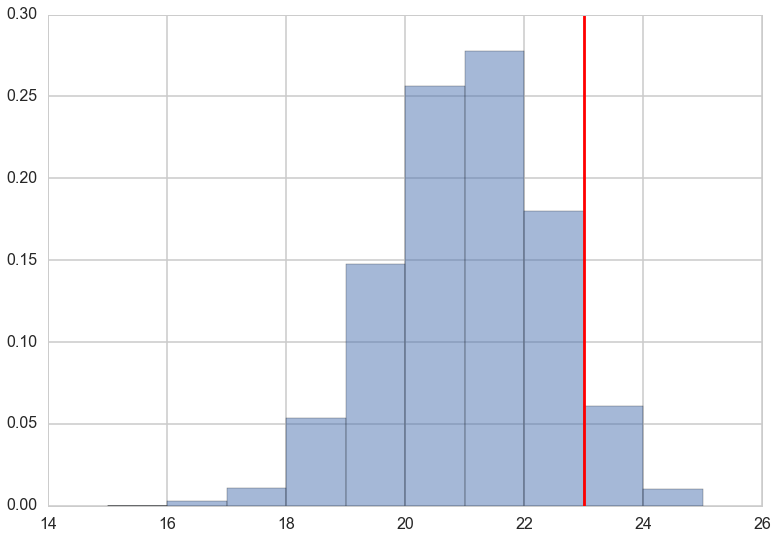

In [34]:
#your code here
plt.hist(weighted_distrib, alpha=0.5, normed=True);
plt.axvline(rwinresults, color='r')

Comment on the results. Did the accuracy and precision improve? Are all our problems gone?

*your answer here*

The accuracy improved, now the mode of our predictions is at 21, a bit closer to the truth of 23 seats. But including the accuracy didn't change our precision much (the spread of our predictions) compared to simple aggregation. 

### Looking deeper into the results

In [35]:
resudf.head(5)

,d_candidate,d_incumbent,d_pct,d_votes,o_candidate,o_incumbent,o_pct,o_votes,other,r_candidate,r_incumbent,r_pct,r_votes,state,status,winner,winrepub,spread
0,Mark Pryor,True,39.5%,"332,669",NaN,NaN,NaN,NaN,0,Tom Cotton,False,56.5%,"476,309",AR,ok,gop,1,17.0
1,Mark Udall,True,46.0%,"916,245",NaN,NaN,NaN,NaN,0,Cory Gardner,False,48.5%,"965,974",CO,ok,gop,1,2.5
2,Michelle Nunn,False,45.1%,"1,154,388",Amanda Swafford,False,1.9%,"48,930",lib,David Perdue,False,53.0%,"1,355,392",GA,ok,gop,1,7.9
3,Bruce Braley,False,43.7%,"491,708",NaN,NaN,NaN,NaN,0,Joni Ernst,False,52.2%,"586,921",IA,ok,gop,1,8.5
4,NaN,NaN,NaN,NaN,Greg Orman,False,42.5%,"358,898",ind,Pat Roberts,True,53.3%,"449,974",KS,ok,gop,1,10.8


Looking at the `resudf` frame we see that the republican and democratic percentages are strings. We'll fix that. Also note that (last line of the frame above) the `KS` election was against an independent candidate, Greg Orman, who is likely to have caucused with the democrats. We'll attribute his vote percentage to the democrats. 

Lets correct the data frame for these.

In [36]:
rpct = resudf.r_pct.apply(lambda x: float(x[:-1]))
dpcts = (resudf.state!='KS')*resudf.d_pct
dpcts[4]=resudf.o_pct[4]#put the other percentage towards the democrats
dpct = dpcts.apply(lambda x: float(x[:-1]))

Add a spread column to see what the spreads in the actual election were.

In [37]:
resudf['spread'] = rpct - dpct
resudf.head(5)

,d_candidate,d_incumbent,d_pct,d_votes,o_candidate,o_incumbent,o_pct,o_votes,other,r_candidate,r_incumbent,r_pct,r_votes,state,status,winner,winrepub,spread
0,Mark Pryor,True,39.5%,"332,669",NaN,NaN,NaN,NaN,0,Tom Cotton,False,56.5%,"476,309",AR,ok,gop,1,17.0
1,Mark Udall,True,46.0%,"916,245",NaN,NaN,NaN,NaN,0,Cory Gardner,False,48.5%,"965,974",CO,ok,gop,1,2.5
2,Michelle Nunn,False,45.1%,"1,154,388",Amanda Swafford,False,1.9%,"48,930",lib,David Perdue,False,53.0%,"1,355,392",GA,ok,gop,1,7.9
3,Bruce Braley,False,43.7%,"491,708",NaN,NaN,NaN,NaN,0,Joni Ernst,False,52.2%,"586,921",IA,ok,gop,1,8.5
4,NaN,NaN,NaN,NaN,Greg Orman,False,42.5%,"358,898",ind,Pat Roberts,True,53.3%,"449,974",KS,ok,gop,1,10.8


We'll merge relevant quantities from both `resudf` and `weighted` data frames to obtain a data frame from which we can compare the spreads we estimate to the actual spreads.

In [38]:
joined = pd.merge(resudf[['state', 'winrepub', 'spread']], weighted, on=["state"])
joined.head()

,state,winrepub,spread,N,poll_mean,poll_std
0,AR,1,17.0,56,3.950850,5.077292
1,CO,1,2.5,49,1.843248,3.943370
2,GA,1,7.9,46,1.683561,4.135623
3,IA,1,8.5,47,0.950752,4.474204
4,KS,1,10.8,4,6.554440,2.362908


#### 1.8 Plot the predicted spreads from `joined` for each state

Here we wish to plot the mean spread (`poll_mean`) and the error on it (`poll_std`), for each state. We then want to compare it to the actual spread of the results (in the `spread` column).

 The diagram should look something like this:

![senate](images/senategraph.png)

The x-axis should mark the states. The y axis, the spread. Plot the poll means with green circles, and color in-between 2 standard deviations, assuming a Gaussian distribution. Mark the Republican wins on the diagram in red color, and Democratic wins in blue using the `spread` column in the dataframe. (You can use the first 3 colors in the seaborn color palette).

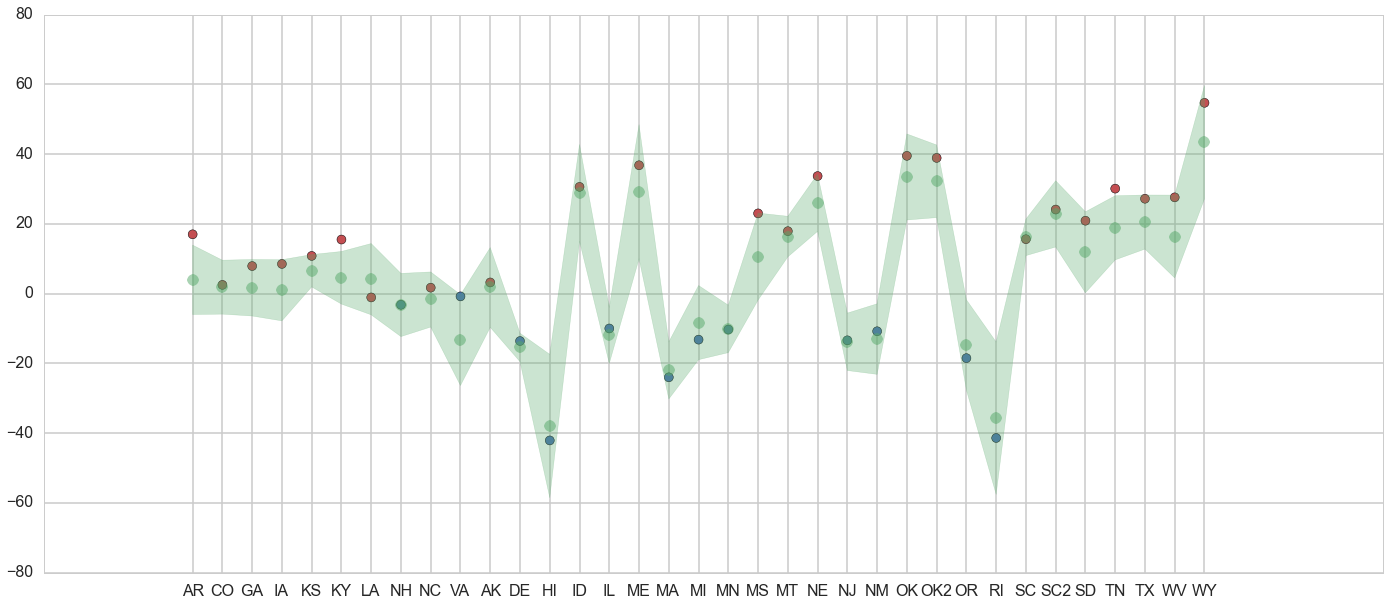

In [39]:
#your code here
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
rmap={0:c0, 1:c2}
plt.figure(figsize=(24,10))
plt.scatter(joined.index, joined.spread, label="actual-spread", s=80, c=[rmap[e] for e in joined.winrepub]);
plt.plot(joined.index, joined.poll_mean, 'o', label="estimated", alpha=0.5, color=c1);
plt.fill_between(joined.index, joined.poll_mean+1.96*joined.poll_std, joined.poll_mean-1.96*joined.poll_std, alpha=0.3, color=c1)
plt.xticks(joined.index, joined.state);


Comment on the resulting figure. Using `resudf`, take a look at the incumbency status in the republican wins. Do you see any inconsistencies in the polls? How do the polls predict the spread for republicans as opposed to Democrats?

*your answer here*

The republican wins were as a general trend under-estimated by the polls leading up to the election. You can see that there are many red dots that fall outside the 2 standard deviation envelope. The democratic wins however were much more accurate. Since in general the results are complementary (i.e. if Republicans are predicted lower, then Democrats must have been predicted higher), there seemed to be a bit of overconfidence in the polls of closer races than actually happened. 

You should find on the whole that the polling fails to capture the extent of the republican win. Indeed the polls were skewed towards democrats.

http://www.huffingtonpost.com/2015/03/24/election-polling_n_6932004.html?ir=India&adsSiteOverride=in

http://fivethirtyeight.com/features/the-polls-were-skewed-toward-democrats/

How can we fix this? One idea is to add a bias to all the poll spreads -- but you must justify the amount of bias. Even so, you could do it ad-hoc in states you think might have problems polling. For example, historically, senate polls have undersold republicans in red leaning states.

Another idea is to bring in such "state fundamentals" information into the model directly. This is what pollsters like Nate Silver do. Indeed, in the last question we shall attempt to do this with a restricted set of features. 


## 2. Predicting an election from a previous one: using linear regression to get vote fractions and study the effects of incumbency

As an example of a different kind of model, we shall predict an election's vote percentage or spread from the previous elections's vote percentage, and **incumbency**. An incumbent is *a candidate contesting the present election who won the seat in the last one*.  

### The State Fundamentals Model

In Q1 we said that we ought to bring in some **state fundamentals** to our calculations. What do we mean?

We imagine yet another poll in a given state whose spreads reflect these fundamentals, such as demographics, republican-lean, incumbency, fund-raising, race, etc. The results of this poll "regularize" the data by having a fair amount of weight in the states when there is not much data, but a smaller weight otherwise (since we then want the data to dominate).

But how do we assign the **State Fundamentals Poll**'s spread in the first place? The answer to this is linear regression of the poll spreads against a variety of features described above. 

We shall consider US House data from 1896 to 1990. This dataset was compiled for [Gelman, Andrew, and Gary King. "Estimating incumbency advantage without bias." American Journal of Political Science (1990): 1142-1164.](http://gking.harvard.edu/files/gking/files/inc.pdf). Why incumbency and why the house? The house gives us lots of races in any given year to validate our model, and in elections which happen every two years, where demography hasn't changed much, incumbency is a large effect, as might be the presence of a national swing (which we would capture in an intercept in a regression).

Let us, then, imagine a very simplified model in which the democratic party's fraction of the vote in this election, for seat(county) $i$, at time $t$ years, $d_{i,t}$, is a linear combination of the democratic party's fraction of the vote in the previous election, at time $t-2$, $d_{i, t-2}$, and a categorical variable $I_{i,t}$, which characterizes the nature of the candidate running in this election:

$$
I =
\begin{cases} 
      -1 & \texttt{Republican Incumbent Running} \\
       0 & \texttt{New Candidate Running} \\
       1 & \texttt{Democratic Incumbent Running}
\end{cases}
$$

In mathematical notation this regression is:

$$d_{t,i} = \beta_1 d_{i, t-2} + \beta_2 I_{i,t} + \beta_0,$$

where $d_{i, t-2}$ is the democratic fraction in county $i$ at the previous election, and $I_{i,t}$ is the factor above which tells us if (and from which party: 1 for dems, -1 for reps) an incumbent is running. We want to find $\beta_0,\beta_1,\beta_2$.

This is our first example of a 'fundamentals' model in which we try and bring something other than sampling to the election prediction game.

Notice that we are regressing on a discrete variable `I`. This incumbency factor takes values 1, -1, or 0. As such it only changes the *intercept* of the regression. You can think of it as 3 regression lines, one for each subpopulation of incumbency, with their *slope constrained to be the same*. An intercept of $\beta_0$ for open seats, $\beta_2+\beta_0$ for Democratic incumbents and $-\beta_2+\beta_0$ for Republican incumbents.

If we can detect a linear trend in the data, a linear regression ought to do a reasonable job. Lets see if this is the case.

Let's first prepare the data.

#### Data Preparation and Cleaning

I've excerpted relevant parts of the dataset documentation in its README file (in the folder `data/congress`) here for you:

BEGIN QUOTE:

Each file is formatted identically with blanks between columns and with the
following fields: (1) State #, (2) District #, (3) Incumbency Code, (4) #
Democratic votes, and (5) # Republican votes.  In all cases, a value of -9
was entered when there was either no data available or appropriate for that
field.  Vote totals can always be compared between elections with the same
state and district number between major redistricting periods.  For
example, the election files corresponding to 1942-1950 will all have the
same number of rows.

- District #:  Districts are numbered as they are by law in each state, with
     the exception that At-Large districts are numbered starting from 98 in
     descending order.  Thus, a 10-district state which includes 2 at-large
     districts will have district numbers 1-8, 97, 98.  Each state will
     have the same number of districts in every file from any given
     redistricting period.  If the above state were to lose its at-large
     districts and change to 10 standard geographic districts before its
     next census-based redistricting, then each file from that
     redistricting period will have district numbers 1-10, 97, 98, with -9s
     filled in for nonexistent elections.
- Incumbency Code:  0=Open seat, 1=Democratic incumbent, -1=Republican
     incumbent.
- num Democratic votes:  The vote total for the Democratic candidate.  If the
     Democratic candidate was also endorsed by a third party, then we have
     added the two vote totals.
- num Republican votes:  The vote total for the Republican candidate.  If the
     Republican candidate was also endorsed by a third party, then we have
     added the two vote totals.
     
Who Won?  Winners can generally be determined from the files by seeing
 which candidate has more votes.  However, this only works for standard
 elections, where a Democrat runs against a Republican and one of them
 wins.  Occasionally, however, a 3d-party candidate will win, or the
 vote totals for the winner will not be available.  In order to
 preserve what was known about those elections, the following algorithm
 should be used to figure out winners:

1. IF both parties have vote totals >= 0, THEN the party with more
votes is the winner.
2. IF both parties have vote totals = -9, THEN either no election took
place, OR there is a 3d-Party winner, OR there was an at-large
election.  In the latter two cases, the election results were
recorded in the exceptions file (excepth.asc).
3. IF one party has a vote total = 0 AND the other party has a vote
total recorded as -9 then that election should be in the
exceptions file (most of these are uncontested elections where
the number of votes for the winner was not reported).
4. IF one party has a vote total > 0 AND the other party has a vote
total = -9, THEN the first party is the winner.
          
END QUOTE

We take pairs of elections, taking care to leave out the pairs which are on two sides of a redistricting.

In [40]:
pairs=[
    (1898,1896),
    (1900,1898),
    (1904,1902),
    (1906,1904),
    (1908, 1906),
    (1910, 1908),
    (1914, 1912),
    (1916, 1914),
    (1918, 1916),
    (1920, 1918),
    (1924, 1922),
    (1926, 1924),
    (1928, 1926),
    (1930, 1928),
    (1934, 1932),
    (1936, 1934),
    (1938, 1936),
    (1940, 1938),
    (1944, 1942),
    (1946, 1944),
    (1948, 1946),
    (1950, 1948),
    (1954, 1952),
    (1956, 1954),
    (1958, 1956),
    (1960, 1958),
    (1964, 1962),
    (1966, 1964),
    (1968, 1966),
    (1970, 1968),
    (1974, 1972),
    (1976, 1974),
    (1978, 1976),
    (1980, 1978),
    (1984, 1982),
    (1986, 1984),
    (1988, 1986),
    (1990, 1988)
]

We read the pairs into a dataframe. This is the information we capture:

- a number for the state
- a number for the district
- D1 and R1, the dem and repub percentages in the past election, and I1 the incumency back then
- D and R, the dem and repub percentages in the present election, and I the incumbency now
- P, the incumbent party from the past election in that seat, 1 for democrats, -1 for republicans
- PNOW, the party which won the current election, 1 for democrats, -1 for republicans

(the command below will take some time)

In [41]:
frames={}
colnames1=['state', 'district', 'I1', 'D1','R1']
colnames2=['state', 'district', 'I', 'D','R']

for p in pairs:
    f2=pd.read_table("./data/congress/%s.asc" % str(p[0]), sep='\s+', header=None, names=colnames2)
    f1=pd.read_table("./data/congress/%s.asc" % str(p[1]), sep='\s+', header=None, names=colnames1)
    #eliminate any data thats not known
    f2n=f2[f2.I!=-9]
    f2n=f2n[f2n.D!=-9]
    f2n=f2n[f2n.R!=-9]
    temp=pd.merge(f2n, f1, on=['state','district'])
    #And get rid of stuff from the previous election
    temp=temp[temp.D1!=-9]
    temp=temp[temp.R1!=-9]
    temp['DP']=temp.D/(temp.D+temp.R)
    temp['DP1']=temp.D1/(temp.D1+temp.R1)
    del temp['I1']#dont care about past election's incumbency
    temp['P'] = 2*(temp.D1 > temp.R1)-1
    temp['PNOW'] = 1*(temp.D > temp.R)
    temp['T'] = 1 - temp.I/temp.P
    #wierdly coded data. Temp['T'] should  never be 2
    temp = temp[temp['T']!=2]
    key = str(p[0])+"-"+str(p[1])
    #further cleaning.
    temp2=temp[(temp.R!=0) & (temp.D !=0) & (temp.R1!=0) & (temp.D1!=0)]
    frames[key]=temp2.copy()

After removing some pathological data coded with `-9`, we then join the two frames obtained from the past and current election. We remove the past incumbency status, since that affects the past election, not the current one. We produce a column `DP` which is the current democratic fraction, `DP1`, the old democratic fraction, `P` which represents which party won the last election, and `PNOW`, which is 1 if a district has a democratic winner, and 0 if the winner is republican. There are some other columns we dont need, but are interesting if you want to play with the data later.

The frames dictionary stores these dataframes, keyed by the year pairs.

Lets see what the frame for the 1990-1988 pair looks like:

In [42]:
frames['1990-1988'].head()

,state,district,I,D,R,D1,R1,DP,DP1,P,PNOW,T
0,1,1,1,126566,50690,176463,51985,0.714029,0.772443,1,1,0
1,1,2,1,105085,70922,143326,81965,0.597050,0.636182,1,1,0
2,1,3,0,90772,83440,147394,74275,0.521043,0.664928,1,1,1
3,1,4,-1,32352,105682,55751,147843,0.234377,0.273834,-1,0,0
4,1,5,0,85803,93912,58612,163729,0.477439,0.263613,-1,0,1


#### Seeing linearity

Now, using this dataframe, let us see if there is reasonable linearity in our data set.

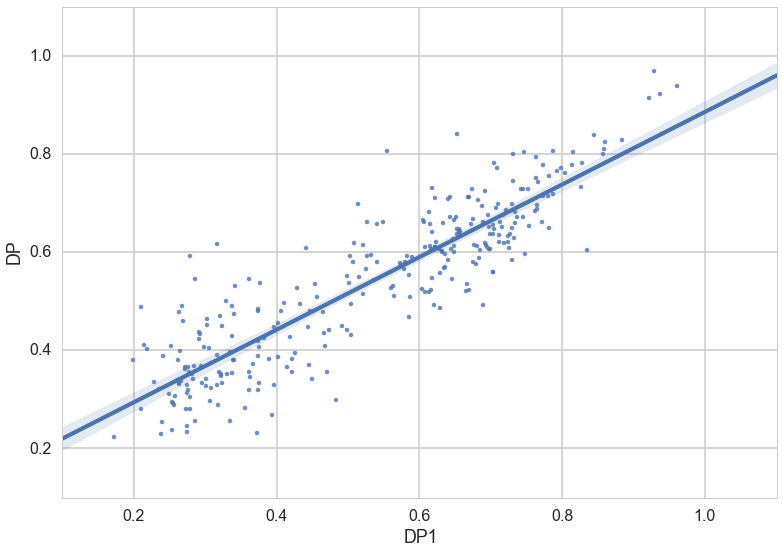

In [43]:
sns.regplot(x="DP1", y="DP", data=frames['1990-1988'])

### Linear Regression

Looks like there is some linear trend at the very least. Lets fit a linear regression:

To carry out the linear regression we'll use `statsmodels` from python, using the `ols`, or Ordinary Least Squares method defined there.

We use the `statsmodels` formula notation. `DP ~ DP1 + I` means linear regress `DP`, the democratic fraction of the vote this time around for a given house seat on `DP1` which is the democratic fraction the previous time around and `I`, a "factor" or categorical(nominal) variable with 3 levels: 

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [45]:
ols_model = ols('DP ~ DP1 + I', frames['1990-1988']).fit()
ols_model

In [46]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DP   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     612.0
Date:                Fri, 02 Oct 2015   Prob (F-statistic):          1.04e-105
Time:                        11:40:51   Log-Likelihood:                 368.81
No. Observations:                 298   AIC:                            -731.6
Df Residuals:                     295   BIC:                            -720.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2326      0.020     11.503      0.000         0.193     0.272
DP1            0.5622      0.040     14.220      0.000         0.484     0.640
I              0.0429      0.008      5.333      0.000         0.027     0.059
==============================================================================
Omnibus:                        7.465   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.316
Skew:                           0.374   Prob(JB):                       0.0258
Kurtosis:                       3.174   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^2$ seems reasonable.

#### Prediction vs Explanation

If you were an analyst or pollster for the democratic or republican party, or just trying to understand fundamentals better, what you really want is an explanation for which features in your model are important. Is incumbency important if you are republican? Or would you be better off with a new candidate? The first thing to do is to **describe** relationships in terms of correlation. Then we try and **explain** it.


There is a difference between description, prediction and explanation (more precisely, causal explanation). We'll refer you to a nice paper on this (https://www.stat.berkeley.edu/~aldous/157/Papers/shmueli.pdf), but the basic idea, which we adapt from the paper and describe (quoted) in the words of the paper, is that we can describe our modeling efforts by a 3-term ontology

(1) Most statistics is concerned with *Descriptive Modeling* which is:

>the most commonly used and developed by statisticians. This type of modeling is aimed at summarizing or representing the data structure in a compact manner. Unlike explanatory modeling, in descriptive modeling the reliance on an underlying causal theory is absent... Fitting a regression model can be descriptive if it is used for capturing the association between the dependent and independent variables rather than for causal inference or for prediction.


(2) Predictive Statistics

>predictive modeling is the process of applying a statistical model or data mining algorithm to data for the purpose of predicting new or future observations...Predictions include point or interval predictions, prediction regions, predictive distributions, or rankings of new observations. Predictive model is any method that produces predictions, regardless of its underlying approach: Bayesian or frequentist, parametric or nonparametric, data mining algorithm or statistical model, etc.

(3) Explanatory Statistics

>explaining is causal explanation and explanatory modeling is the use of statistical models, especially regression, for testing causal explanations.


For descriptive and explanatory purposes it is very important to get features right. For predictive modeling, as we shall see in the next homework, we can sometimes play fast and furious with our features, and are more concerned with the *out of sample* predictive performance than any interpretability of our features. We shall encounter such modeling soon.

In this question, though, we are more focussed on descriptive modeling. In question 3, we'll use this descriptive modeling in the aid of the prediction we tried in Q1, a really simple kind of prediction where we try and learn a simple population statistic(spread) from sample statistics.

As an example of our descriptive process here, consider incumbency. You might decide to test incumbency by simply computing the proportion of incumbents who win-reelection. If this is high, go with your incumbents.

This may seem like a reasonable approach, but after a bit of thinking you'll start seeing drawbacks. In particular, you would be overstating the effect of incumbency, because it does not take into account that there could be a high re-election rate for incumbents due to differences in districts. To be principled you do the regression:

`DP1 ~ DP + I`. 

We did this above. At this point you might ask, is this enough? You then think a little bit more and realize that, for example, in many conservative districts you will have a republican elected whether he/she is an incumbent or not. And you now realize that our analysis does not consider the party of the incumbent. So you decide to fix this

Lets define $P_{t,i}$ as the party in power right now before the election at time $t$, i.e. the party that won the election at time $t-2$ in county $i$. It takes on values:

$$
P =
\begin{cases} 
      -1 & \texttt{Republican Seat holder} \\
       1 & \texttt{Democratic Seat holder}
\end{cases}
$$

We can do this regression instead:

DP1 ~ DP + I + P, where

P represents the incumbent party, i.e. the party which won the election in year t−2.

In mathematical notation we have:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_2 I_{t,i} + \beta_3 P_{t,i} + \beta_0 ,$$

where $P_{t,i}$ is the party in power right now before the election at time $t$, i.e. the party that won the election at time $t-2$ in county $i$. The value of $P$ is 1 for democrats, and -1 for republicans.

###Interpretable Regressions

One can say that **The coefficient of `I` now more properly captures the ￼effect of incumbency, after controlling for party.**

Regression coefficients become harder to interpret with multiple features. The meaning of any given coefficient depends on the other features in the model. Gelman and Hill advise: **Typical advice is to interpret each coefficient “with all the other predictors held constant.”**[Gelman, Andrew; Hill, Jennifer (2006-12-25). Data Analysis Using Regression and Multilevel/Hierarchical Models] Economists like to use the phrase "ceteris paribus" to describe this.

The way to do this is interpretation to look at the various cases and explain what the co-efficients of `P` and `I` mean. Let us at first set `I` to 0 meaning no incumbents and explain what the coefficients of `P` mean. 
We are then fitting:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 P_{t,i} + \beta_0 ,$$

which for the $P=1$ (Democrat party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 + \beta_0 ,$$

and, for the $P=-1$ (Republican party winning the past election) case, gives us:

$$d_{t,i} = \beta_1 d_{t-2,i} - \beta_3 + \beta_0 .$$

You can see that $\beta_3$ then captures half the difference in the effect between democrats and republicans that comes from just having the party incumbent. It tells us that, with respect to the national swing measure $\beta_0$, whats the party effect for republicans and democrats. It does it very poorly by splitting the difference between the democratic and republican party effects and being constant across seats, but its a start.



####2.1 Explain the coefficient of Incumbency

This is the co-efficient $\beta_2$. Use a similar argument to the one above. Note that setting $I$ to 1 also constrains $p$ to 1, but the reverse is not true as we saw above.

*your answer here*

On the other hand setting $I=1$ also necessitates setting P to 1. Then we get:

$$d_{t,i} = \beta_1 d_{t-2,i} + \beta_3 +\beta_2 + \beta_0 ,$$

and setting $I=-1$ gives: 

$$d_{t,i} = \beta_1 d_{t-2,i} - \beta_3 -\beta_2 + \beta_0 .$$

TODO: write more explanation.

#### 2.2 Write a function `ols_regression`  to do such a linear regression for every pair of years

We'll linear regress each pair of years in dataframes dictionary `framedict` separately. Since we are interested in description and explanation, rather than prediction, we shall use the entire data set, rather than doing cross-validation. We usually worry about overfitting when dealing with prediction.

Write a function `ols_regression(formula, framedict)` of the formula being used and the dictionary of frames we created. Use `statsmodels` as before. We store all the results, one row for each year-pair's regression in an output dataframe.

This dataframe has columns `yp`, the year-pair string (the keys of the dictionary of frames), the year for which we do the regression `year` (the higher year in the pair), the `formula`, which is just repeated, and the R-squared in `R2` for each regression, as well as the parameters of the regression and the p-values for the regression (for the name of the column here prefix the parameter with `p_` to denote the p-value). We will explain what these p-values are later.

(see `params` and `pvalues` in statsmodels)

In [47]:
"""
Function
--------
ols_regression

Inputs
------
formula : a regression formula to be fit
framedict : the dictionary above, with keys the year pairs and values the DataFrame for each year pair
   
Returns
-------
    A dataframe with columns:
    yp: the year pair
    year: the higher year of the year pair..an integer
    formula: we just copy the formula from the input
    R2: the R^2 of each regression
    A column corresponding to each param in the regression
    A column for each p-value in the regression (stored as p_paramname)
Notes
-----
"""

#your code here
def ols_regression(formula, framedict):
    loc=[]
    for yp, frame in framedict.items():
        model = ols(formula, frame).fit()
        d = dict(model.params)
        e=dict(model.pvalues)
        for k,v in e.items():
            d['p_'+k]=v
        d['yp']=yp
        d['year']=int(yp.split('-')[0])
        d['formula']=formula
        d['R2']=model.rsquared
        loc.append(d)
    df = pd.DataFrame(loc)
    return df.sort(columns=['year'])

We provide here a 2x2 viz function `plot_panel` which takes the ols results dataframe and plots the coefficients of 3 features with the "column" name (in the dataframe of the feature followed by the label, as arguments, repeated 3 times. The last of the 4 panels, plots the $R^2$.

In [48]:
def plot_panel(ols_frame, *keys):
    fig, axes=plt.subplots(figsize=(9,9), nrows=2, ncols=2);
    plt.title(ols_frame.formula[0])
    axes[0][0].plot(ols_frame.year, ols_frame[keys[0]], '.-', label=keys[1])
    axes[0][0].legend()
    axes[0][1].plot(ols_frame.year, ols_frame[keys[2]], '.-', label=keys[3])
    axes[0][1].legend()
    axes[1][0].plot(ols_frame.year, ols_frame[keys[4]], '.-', label=keys[5])
    axes[1][0].legend()
    axes[1][1].plot(ols_frame.year, ols_frame['R2'], label="$R^2$")
    axes[1][1].legend()
    axes[1][0].set_xlabel("year")
    axes[1][1].set_xlabel("year")
    axes[0][0].set_xlim([1898, 1990])
    axes[0][1].set_xlim([1898, 1990])
    axes[1][0].set_xlim([1898, 1990])
    axes[1][1].set_xlim([1898, 1990])
    plt.tight_layout();
    return axes

And this function provides a mean $R^2$ over all the years

In [49]:
def meanr2(of):
    return of['R2'].mean(), of['R2'].std()

#### 2.2 Carry out the linear regression `DP ~ DP1 + I + P` for all the year pairs

Save the results in the dataframe `ols_frame`. Report the mean $R^2$ and use `plot_panel` above to plot the coefficients of `I`,  and `DP1`, appropriately labelled. 

mean R^2 (0.8081905024359912, 0.06188252197990417)


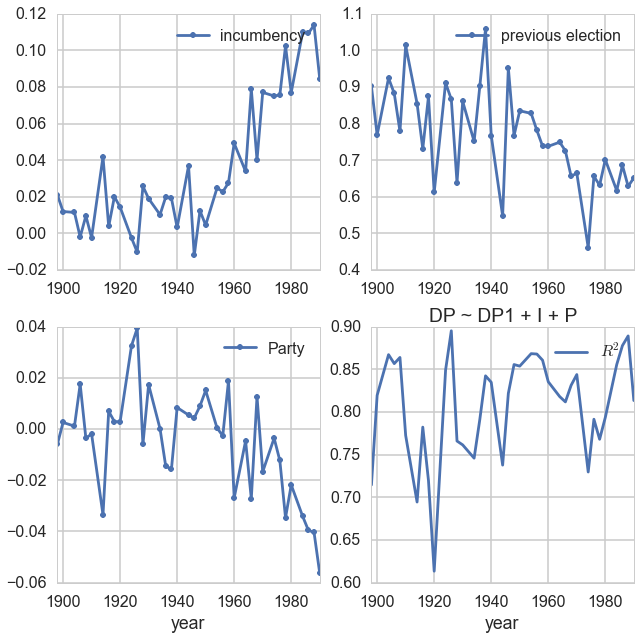

In [50]:
ols_frame=ols_regression('DP ~ DP1 + I + P', frames)
print "mean R^2", meanr2(ols_frame)
#After the frame, the next arg is the param, the next its label. This repeats for upto 3 params
plot_panel(ols_frame, 'I','incumbency','DP1', 'previous election', 'P','Party')
plt.legend();

Comment on the trend in the incumbency and party coefficients after 1960.

*your answer here*

Incumbency is high post 1960

##### Inference using Bootstrap

We have obtained the incumbency treatment coefficient values, but to say if the effect of incumbency treatment truly exists, we need to carry out inference on this coefficient. In other words, its not enough to get the mean value, which the regression gives us, but the range of possible coefficient values around it. 

One way to make an inference like this is to do bootstrap. Bootstrap is a resampling technique is a way of obtaining inferences about a population from a smaller sample. It is a very general method for assessing the variability of a quantity of interest, in our case the incumbency effect. This method was conceived and justified in the frequentist paradigm of statistics, however it enjoys popularity in many fields of practice, including machine learning, due to it's simplicity. 


Bootstrap involves **sampling with replacement** from the data and recalculating the quantity of interest, in our case the regression. This will give you a **new coefficient** for each regression -- in principle we can then look at the distribution of the coefficients from each regression and this should give us some level of uncertainty about our coefficient. 

**There are some considerations that need to be taken when working with such a method however**, the biggest of which is that the sample we're working with is **representative** of the population of interest. If you're interested in using the method for more complex applications it if imperative to familiarize with the assumptions, [this](http://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works) is a good start, but [this article](https://goo.gl/2T6k8j) is also helpful.

For our simple application however we can run this and look at the distribution of our coefficients. This will give us a good idea of the possible range of values for our incumbency effect. If 0 is a likely value, then we can't say conclusively that the effect is real.

#### 2.3 Bootstrap a distribution for the coefficient of I for 1990-1988

Using `pandas` and `sample`, **resample with replacement** our seats data set, and **fit the regression** a total of 1000 times. Capture the 1000 values of the regression coefficient of the incumbency ($\ I\ $), and plot a **histogram of the distribution** of the co-efficient. Also print the the 5th and 95th quantile of the distribution to give a non-parametric **confidence interval**. 

[ 0.05557492  0.11326628]


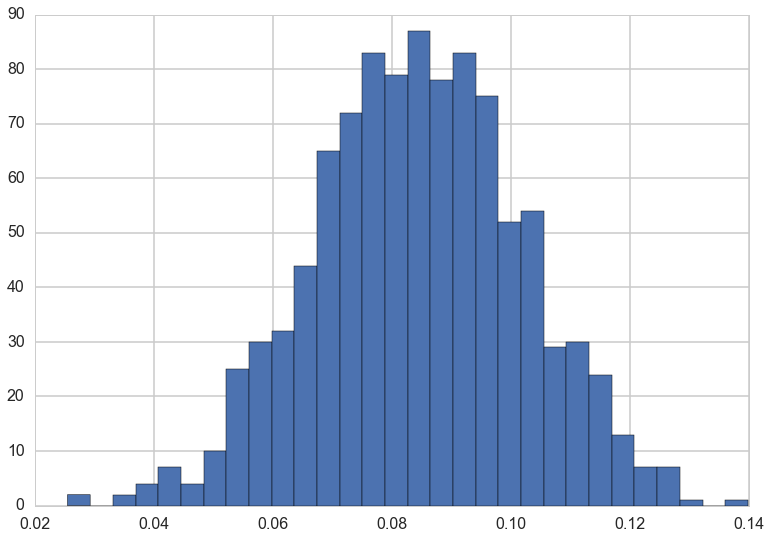

In [51]:
#your code here
frame90 = frames['1990-1988']
ptcoefs=[]
size90=frame90.shape[0]
for i in range(1000):
    #cframe=frame90.iloc[np.random.randint(size90, size=size90)]
    cframe=frame90.sample(n=size90, replace=True)
    cmodel = ols('DP ~ DP1 + I + P', cframe).fit()
    ptcoefs.append(cmodel.params['I'])
print np.percentile(ptcoefs, [5, 95])
plt.hist(ptcoefs, bins=30);

##### Inference using p-values

Of-course, another more classic way of doing this same inference is though the **regression itself** -- it give us p-values. These are values from a t-test that asks if the coefficient is different from 0. The regression machinery assumes Normality of errors for this purpose. Lets assume the Normality and do an inference on all the years in our regression. The assumption used to calculate these p-values are: for each model (in our case `year`), the errors at each point of the regression are uncorrelated and follow a Normal distribution. We shall assume these to be true for now (in real life you ought to be checking a plot of residuals as well).

Generally we'd like the p-values to be vanishingly small as they **represent the probability that we observed such an extreme incumbency effect purely by chance**. Have a look at the Wikipedia page on [p-values](https://en.wikipedia.org/wiki/P-value) for a quick reminder.

Furthermore, when constructing results like this (where there are many tests considered at once) there are other concerns to take into account. **One such concern is the issue of [multiple testing](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)**. This is important because when we start dealing with a **large number** of hypotheses jointly the probability of making mistakes gets larger, hence we should be **more stringent** about what it means for a result to be significant. One such correction is the [**Bonferroni Correction**](https://en.wikipedia.org/wiki/Bonferroni_correction) which provides a new bound for deciding significance, instead of asking the classic question: **is the p-value < $0.05$**?, this considers instead a stricter bound, we ask: **is p-value < $0.05/H$**. Where $H$ is the number of hypotheses being considered, in our case $H = 38$ (the number of years) -- this is a much higher bar for significance.

#### 2.4 What can we say from the values of the incumbency coefficients over time?

Plot a graph of incumbency (`I`) coefficient p-vales for every year. Use this plot to study if the coefficients after 1960 are **significantly different** from 0, plot them in **log scale** for easier viewing of small numbers. Also draw lines at $\log(0.05)$ and $\log(0.05/38)$ for reference. Interpret your results below.

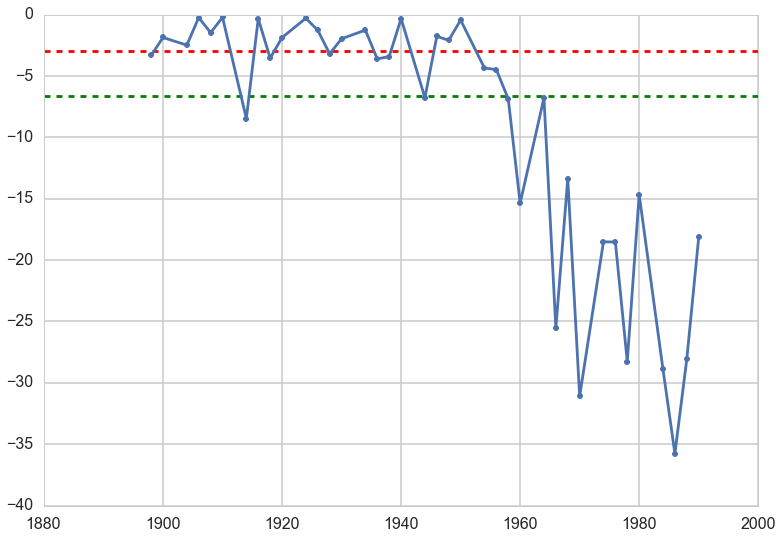

In [52]:
#your code here
t = np.arange(1880, 2010, 10)
plt.plot(t, t*0 + np.log(0.05), 'r--', t, t*0 + np.log(0.05/38), 'g--', ols_frame.year, np.log(ols_frame['p_I']), '.-', label="incumbency treatment")


*your answer here*

For the most part the p-values after 1960 are below the Fisher 0.05 limit. If we consider the values after 1060 to be all representative of one quantity, we see that they are below the Bonferroni correction as well.

TODO: is it ok to take all the years into account?

###Is the regression complete? Or do we need more features?

Recall that our model is fairly restrictive, the different incumbency groups are allowed to have different intercepts but the new candidate group, $I = 0$ is equally between the two incumbency groups. Furthermore, the incumbency groups are not allowed different slopes, meaning the effect of the previous elections Democratic fraction (`DP1`) is assumed the same for all incumbency groups. This may not be the case. 

In the figure below we can see that in fact the different groups seem to have not only different intercepts, but also possibly different slopes. 

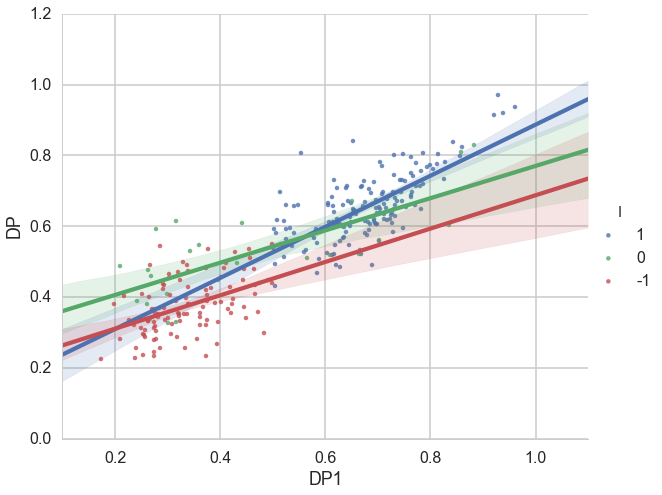

In [53]:
sns.lmplot(x="DP1", y="DP", hue = "I", data=frames['1990-1988'], size = 7, aspect=1.2)

#### 2.5 Carry out the linear regression with an interaction between the previous elections democratic fraction and this elections incumbency, for all the year pairs

In mathematical notation this regression is:

$$d_{t,i} = \beta_4 d_{i, t-2} I_{i,t} + \beta_3 I_{i,t} + \beta_2 P_{i,t} + \beta_1 d_{i, t-2} + \beta_0,$$

When we add a term like $\beta_4 d_{i, t-2} I_{i,t}$, we are adding an **interaction** (a simple one) between the two features. Now we no longer have a simple slope/intercept division.

In `statsmodels` notation, we wish to carry out the regression:

`DP ~ DP1 + I + P + DP1:I`

Save the results in the dataframe `ols_frame_interact`. Report the mean $R^2$ and use `plot_panel` above to plot the coefficients of `I`, `DP1`, and `I:DP1`, appropriately labelled. Is there evidence for interaction. How can you know for sure?

mean R^2 (0.8089391856536681, 0.06177956521979443)


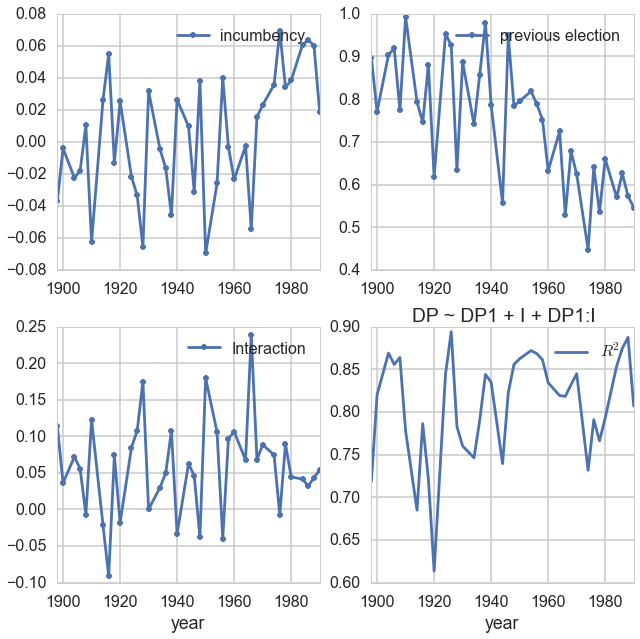

In [54]:
#your code here
ols_frame_interact=ols_regression('DP ~ DP1 + I + DP1:I', frames)
print "mean R^2", meanr2(ols_frame_interact)
plot_panel(ols_frame_interact, 'I','incumbency','DP1', 'previous election', 'DP1:I','Interaction')
plt.legend();

*your answer here*

TODO: interpretation

**Q2 ends here, feel free to continue at Q3, but read on if you are curious about how the pros handle this model**.

### Further work for later: Causal Models

We have been in a descriptive mode with our regressions where we interpret the coefficients. 

Since we are doing explanatory modeling, we havent held out any data to actually test our regressions, and thus we dont know what the predictive power of our fits is. Thus we'd be using the data to both fit and validate the model. We might be overfitting

But notice that in the conclusions we have asked you to draw, we dont actually care to make any predictions. We didnt ask you to split the counties into training and test sets. Rather, we asked for interpretations regarding the fit values of the co-efficients.

However, this is still not a causal explanatory model. As an analyst, you typically start with prediction, move to description, (the two of these are recursive, as we shall see in feature selection in machine learning) which emphasizes finding the correlations, and onward to explanation or causal analysis.

Let's define a new variable we'll call $T$ (for treatment), we want this variable to indicate the treatment of a new candidate. In essence we want to think about this as a Randomized Control Trial (RCT) where we want to decide if we should replace an incumbent for a new candidate, or not. 
$$
T =
\begin{cases} 
      0 & \texttt{Incumbent Running} \\
      1 & \texttt{New Candidate Running}
\end{cases}
$$

From Gelman and Hill  -- get the causal inference chapter [here](http://www.stat.columbia.edu/~gelman/arm/chap9.pdf):

>Causal inference concerns what would happen to an outcome y as a result of a hypothesized “treatment” or intervention. In a regression framework, the treatment can be written as a variable $T$
with $T_i = 1$ if unit $i$ receives the “treatment”, and $T_i=0$ if unit $i$ receives the “control”...

>The basic idea is that since we cannot compare treatment and control outcomes for the same units, we try to compare them on similar units. Similarity can be attained by using randomization to decide which units are assigned to the treatment group and which units are assigned to the control group. We will discuss this strategy in depth in the next section.

>Although we cannot estimate individual-level causal effects [...], we can design studies to estimate the population average treatment effect: average treatment effect = $avg ( y_i(T=1) − y_i(T=0) )$,
for the units i in a larger population.

One might get a chance to do RCT's in a clinical trial, or a roll-out of a development program in a village, but this cannot be done for an election. So we have here the next best thing: an **observational study**.

Gelman and Hill, again:

>As opposed to making the same assumption as the completely randomized experiment, the key assumption underlying the estimate is that, conditional on the confounding covariates used in the analysis (here as inputs in the regression analysis), the distribution of units across treatment conditions is, in essence, “random”  with respect to the potential outcomes. To help with the intuition here, one could envision units being randomly assigned to treatment conditions conditional on the confounding covariates; however, of course, no actual randomized assignment need take place.

Going through the cases (incumbent x party), you can convince yourself that 

`I = (1 - T)P`.

Our attempt to estimate incumbency advantage (the coefficient of `I`) can now be cast into a causal structure. Think of a "treatment" made by the party on a seat, where this treatment is the decision to run a new candidate. Then, incumbents are controls, and open seats are "treated units". We defined `T` with value 1 if the seat is made open by the party holding the seat from the past election, and value 0 if the incumbent stands again.
Thus, “incumbency advantage” is the effect of `T` = 0 compared with 1.

Thus in our case we must think of `T` conditional on holding `P` and democratic fraction constant.

The regression we've been working with (the one without the interaction) formula now has the structure in terms of the treatment indicator (which we get by replacing $I$ by $(1-T)P$:

$$d_{i,t} = \beta_1 d_{i,t-2} + \beta_2 (1-T_{i,t})P_{i,t} + \beta_3 P_{i,t} + \beta_0,$$

where $T_{i,t}$ is the Treatment, a new candidate (1) or not (0) in county $i$ at time $t$ (just before this election).

We can use the Python regression notation:

`DP ~ DP1 + P + P:T`,

where `P:T` is an interaction term between `P` and `T`. In order to interpret these coefficients we'll need to rewrite our model above

$$d_{i,t} = \beta_1 d_{i,t-2} + (\beta_2 + \beta_3) P_{i,t} - \beta_2 T_{i,t}P_{i,t} + \beta_0,$$

Hence, the coefficient for the interaction ($\beta_2$) can be interpreted as the negative Incumbency effect. But this model should fit exactly the same otherwise since our new definitions are not adding any new information. 


If we want to add more information, we can add a term `T` which is linear in the treatment variable. This "main effect" for `T` represents a difference between the incumbency effects for both parties, controlling for the effect of a new candidate (either republican or democrat). Now the incumbency effect is the coefficient of the interaction term `P:T`.

This gives us:

`DP ~ DP1 + P + T + P:T`, or

$$d_{i,t} = \beta_1 d_{i,t-2} + \beta_2 T_{i,t} + \beta_3 T_{i,t}P_{i,t} + \beta_4 P_{i,t} + \beta_0,$$

We wont carry out this regression in the homework, but our dataframe has all the information for you to play with this regression if you like. Have fun!

There is still the matter of that pesky interaction term. We'll just point you to the paper(s) on which this homework is based, which shows how you might handle that interaction term, and also points out more sophisticated modeling techniques that you would learn in an upper level stats course or IACS's AM207.

You can read much more about this in Gelman, Andrew, and Zaiying Huang. "Estimating incumbency advantage and its variation, as an example of a before–after study." Journal of the American Statistical Association 103.482 (2008): 437-446. (http://www.stat.columbia.edu/~gelman/research/published/JASAAP03026R1.pdf)

## Q3. Improving our senate predictions via "state fundamentals"

We started this homework with the goal of using the vote fraction or spread on polling samples to learn the actual distribution of the population: predict the behavior of a voting population. Having done that, we then explored explanatory modeling to create a model of for the vote fraction or spread in terms of factors such as incumbency and party. Lets circle back to predictions on the senate data. 


Lets use our knowledge about the importance of incumbency and other *states* to create a simple "state fundamentals" model for our senate polls. We will add this model in as **an additional poll**, thus providing information where there are not too many polls and trusting the polls more where there are many more. This is an example of the process of regularization of the data, or the borrowing of statistical strength from some "prior" or average behavior across units. We'll learn more about such regularization in machine leaning and in bayesian statistics.

In reality we should be modeling many factors to make a good "state fundamentals" model. In a post near the 2014 midterm elections, Nate Silver explains his methodology in [this article](http://fivethirtyeight.com/features/how-the-fivethirtyeight-senate-forecast-model-works/). The basic idea is to regress the republican vote fraction on a variety of demographic, economic, and campaign factors. Here we shall not do such a regression, but consider incumbency and partisanship as factors to include in a model. 

To do this the "right way", we would regress the vote fraction on these over multiple senate elections, but in the interests of time *we will give you the relative weights of two features*, incumbency and partisanship,  in the 2014 cycle only.

### Estimating election bias using the house

We first read in all the house polls carried out over the US in 2014 to gauge overall sentiment towards republicans. This bias value `b2008` was -10.5 in 2008 when there was a huge swing towards the democrats. We've done the downloading and processing of the data from the Huffpost API for you.

In [55]:
b2008=-10.5

In [56]:
hpus = pd.read_csv("./data/housepolls.csv")
hpus.head()

,chart,d,end_date,incumbent,moe,name,observations,partisan,pollster,r,start_date,state,subpopulation,spread,poll_date,age_days
0,2014-national-house-race,42,2014-10-30 00:00:00,I,4.1,2014 National House Race,802,Nonpartisan/None,HuffPost/YouGov,46,2014-10-28 00:00:00,US,Likely Voters,4,2014-10-29 00:00:00,4
1,2014-national-house-race,45,2014-11-01 00:00:00,I,3.4,2014 National House Race,826,Nonpartisan/None,NBC/WSJ,46,2014-10-30 00:00:00,US,Likely Voters,1,2014-10-31 00:00:00,2
2,2014-national-house-race,42,2014-10-27 00:00:00,I,4.0,2014 National House Race,624,Nonpartisan/None,CBS,50,2014-10-23 00:00:00,US,Likely Voters,8,2014-10-25 00:00:00,8
3,2014-national-house-race,45,2014-10-27 00:00:00,I,3.5,2014 National House Race,734,Nonpartisan/None,FOX,44,2014-10-25 00:00:00,US,Likely Voters,-1,2014-10-26 00:00:00,7
4,2014-national-house-race,47,2014-10-26 00:00:00,I,4.0,2014 National House Race,540,Nonpartisan/None,CNN,46,2014-10-24 00:00:00,US,Likely Voters,-1,2014-10-25 00:00:00,8


Lets calculate the 2014 bias by taking the moe and time-weighted average of the polls using the functions `wmean` and `wsig` from above.

In [57]:
b2014=wmean(hpus)
b2014e=wsig(hpus)

In [58]:
b2014, b2014e

(0.037884769510913706, 3.936300862345726)

The mean is almost zero, but the standard deviation is large. We'll ignore the standard deviation for now and just use the mean bias in 2014.

### Incumbency and Partisan-ness

Lets read in data on the 2008 senate poll about only those candidates who stood again in 2014, and store the information in the dataframe `ridf`. This was the previous time that most of these seats were up for election, the senate having a 6 year cycle. We read in the winner and the percentage for those races.

In [59]:
ridf=pd.read_csv('./data/senate2008realincs.csv')
ridf

,State,winner,pctd,pctr,comment
0,AR,D,79.50,20.50,Green
1,CO,D,52.80,42.50,NaN
2,KY,R,47.00,53.00,NaN
3,NH,D,51.70,45.20,NaN
4,NC,D,52.70,44.20,NaN
5,VA,D,65.00,33.70,NaN
6,AK,D,47.80,46.60,NaN
7,ID,R,34.10,57.70,NaN
8,IL,D,67.80,28.50,NaN
9,ME,R,38.60,61.30,NaN


There are many points of comment:

- AR-the opponent was a green party candidate so remove this
- DE-special election Christopher Coons in 2010 as Biden gives up his seat (considered incumbent)
- HI-special election (considered incumben)
- MA-special, vacated as Kerry becomes secretary of state (considered incumbent)
- NJ-lautenberg dies, Cory Booker gets in (considered incumbent)

We have considered candidates of the same party who replace an incumbent in a special election or otherwise as incumbents (see points of comment above). 

We remove Arkansas from our analysis (see points above).

In [60]:
ridf=ridf[ridf.State!='AR']

We calculate the change in national bias from 2008 to 2014

In [61]:
bcorr=b2014 - b2008
bcorr

10.537884769510914

#### 3.1 create new columns in the incumbency data frame `ridf` called  `spread` and `cspread`

The first one, `spread` is the spread between Republican vote percentage and Democratic vote percentage, and the second `cspread` (for corrected `spead`), corrects this for the change in bias `bcorr` between 2008 and 2014. The reason to do this is to look at the incumbents who came in in 2008 or through special elections after, and see how they might do in the more neutral political climate of 2014. The logic behind it is as follows: we believe democratic candidates would have a harder time in 2014 than in 2008, because in 2008 they rode an huge wave generated by Obama's election. And republicans elected in 2008 who are incumbents now are stronger candidates: the bucked the wave then and have the advantage of incumbency now.

In [62]:
ridf['spread'] = ridf.pctr - ridf.pctd
ridf['cspread'] = ridf['spread'] + bcorr
ridf.head()

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,State,winner,pctd,pctr,comment,spread,cspread
1,CO,D,52.8,42.5,NaN,-10.3,0.237885
2,KY,R,47.0,53.0,NaN,6.0,16.537885
3,NH,D,51.7,45.2,NaN,-6.5,4.037885
4,NC,D,52.7,44.2,NaN,-8.5,2.037885
5,VA,D,65.0,33.7,NaN,-31.3,-20.762115


#### Obtain `spread` and `cspread` from the PVI

Now lets read in the Partisan Voting Index. This is an index from the [Cook Political Report](https://en.wikipedia.org/wiki/Cook_Partisan_Voting_Index) which uses the 2012 and 2008 elections to gauge how partisan a state is and in which bipartisan direction. The number reported shows the **swing in the state with respect to the national consensus**, and thus a notion of how biased a state is compared to the national average.

In [63]:
pvi=pd.read_csv('./data/pvi.csv')
pvi.head()

,State,PVI
0,AL,R+14
1,AK,R+12
2,AZ,R+7
3,AR,R+14
4,CA,D+9


Let's add the columns `spread` and `cspread` to the `pvi` dataframe. Remember that since these are with respect to the national average(consensus), we only need `b2014` for this, and not `bcorr`. We'll also make Republicans the positive direction, i.e. `R+14` will be `14` while `D+14` will be `-14`.

In [64]:
def parsepvi(x):
    mult={'D':-1, 'R':1}
    if x=='EVEN':
        return 0.0
    else:
        P,V=x.split('+')
        return mult[P]*float(V)
    

pvi['spread']=pvi.PVI.apply(parsepvi)   
pvi['cspread']=b2014+pvi['spread']
pvi.head()

,State,PVI,spread,cspread
0,AL,R+14,14,14.037885
1,AK,R+12,12,12.037885
2,AZ,R+7,7,7.037885
3,AR,R+14,14,14.037885
4,CA,D+9,-9,-8.962115


### Incorporating "state fundamentals" as a new poll

Let's combine the Partisan Voting Index (PVI) spread factor with the incumbency advantage calculated in `ridf` to make a "state fundamentals" model which we shall incorporate into our analysis as a new poll. 

Lets make dictionaries to capture the corrected spread and state pairs from both `ridf` and `pvi`:

In [65]:
pvidict={k:v for [k,v] in pvi[['State','cspread']].values}
ridfdict={k:v for [k,v] in ridf[['State','cspread']].values}  

#### 3.2 Combine PVI spreads and incumbency spreads into a model

We shall consider a model in which we give the **incumbency spreads a weight of 0.3**, if there is an incumbency to deal with, and the **PVI spread a weight of 0.7**. If there is no incumbency for a state race, just use the PVI spread.

As we said earlier, the relative ratio of these weights ought to come from a regression of previous data on these factors. 

This is not a very complex model, but it does deal with some of the issues we've run into before, recall the state-level inaccuracies in Section 1.8.  Incorporating the PVI may address this issue. 

Write a function `get_spread` which takes a state identifier and returns the appropriately weighted spread, using `pvidict` and `ridfdict`.

In [66]:
#your code here
iweight = 0.3
pviweight = 0.7
def get_spread(state):
    if not ridfdict.has_key(state):
        return pvidict[state]
    wsp = iweight*ridfdict[state] + pviweight*pvidict[state]
    return wsp

We create a template dictionary with all the "columns" we will need to add these models as polls in the style of the `multipoll` dataframe. 

In [67]:
template=dict(
    chart='c',
    d=-99.9,
    r=-99.9,
    spread=0.0,
    incumbent='i',
    moe=-99,
    end_date='end',
    name='c',
    observations=100,
    partisan='n',
    pollster='us',
    start_date='start',
    state='US',
    subpopulation='',
    poll_date='',
    age_days=30
)

We write some code to return the correct states for `OK2` and `SC2`:

In [68]:
smapper={'OK2':'OK', 'SC2':'SC'}
def sret(state):
    if state in smapper.keys():
        return smapper[state]
    return state 

####We write code which uses the template and the above mapper function to return a dataframe `additional_polls` 

This process translates our model into a `multipoll` like data frame. We iterate over the unique states in `multipoll`, each time making a copy of the template. Use the mapper function `sret` above to obtain the correct state, and save this in the column `state`. Set the `age_days` to 10: we are applying this poll at a relatively late date since we want our "state fundamentals" to have some weight. We also fill in the `spread` term in the dictionary by using the `get_spread` model function you defined above. Finally, this model actually has no margin of error. But if we put it in with no such margin, it would outweigh everything else. And since we dont know if we got the fundamentals right, we should be conservative. So we set it to 0.3 times the absolute value of the spread.

We create a dataframe `additional_polls`, with the same columns as `multipoll`. 

In [69]:
lod=[]
for s in multipoll.state.unique():
    d=template.copy()
    d['state']=s
    d['age_days']=10
    d['spread']=get_spread(sret(s))
    if ridfdict.has_key(sret(s)):
        d['ridf']=ridfdict[sret(s)]
        d['indic']=1
    else:
        d['ridf']=-9
        d['indic']=0
    d['pvi'] = pvidict[sret(s)]
    d['moe']=0.3*np.abs(d['spread'])
    lod.append(d)
additional_polls=pd.DataFrame(lod)
additional_polls.head()

,age_days,chart,d,end_date,incumbent,indic,moe,name,observations,partisan,poll_date,pollster,pvi,r,ridf,spread,start_date,state,subpopulation
0,10,c,-99.9,end,i,0,1.811365,c,100,n,,us,6.037885,-99.9,-9.000000,6.037885,start,GA,
1,10,c,-99.9,end,i,1,1.739365,c,100,n,,us,-5.962115,-99.9,33.237885,5.797885,start,ME,
2,10,c,-99.9,end,i,1,0.180635,c,100,n,,us,-0.962115,-99.9,0.237885,-0.602115,start,CO,
3,10,c,-99.9,end,i,1,3.368365,c,100,n,,us,12.037885,-99.9,9.337885,11.227885,start,AK,
4,10,c,-99.9,end,i,0,1.188635,c,100,n,,us,-3.962115,-99.9,-9.000000,-3.962115,start,MI,


Now we shall concatenate these additional polls with `multipoll` to obtain a new dataframe `alladded`. We have thus set up our "regression" as an additional poll in the data for each state.

In [70]:
alladded = pd.concat([multipoll, additional_polls])
alladded.head()

,age_days,chart,d,end_date,incumbent,indic,moe,name,observations,partisan,poll_date,pollster,pvi,r,ridf,spread,start_date,state,subpopulation
11,1.5,2014-georgia-senate-perdue-vs-nunn,45,2014-11-02 00:00:00,I,NaN,2.60,2014 Georgia Senate: Perdue vs. Nunn,1463,Nonpartisan/None,2014-10-31 12:00:00,InsiderAdvantage/Fox 5 Atlanta/Morris News Ser...,NaN,48,NaN,3,2014-10-30 00:00:00,GA,Likely Voters
13,1.5,2014-georgia-senate-perdue-vs-nunn,44,2014-11-02 00:00:00,I,NaN,4.10,2014 Georgia Senate: Perdue vs. Nunn,591,Nonpartisan/None,2014-10-31 12:00:00,SurveyUSA/11Alive,NaN,47,NaN,3,2014-10-30 00:00:00,GA,Likely Voters
16,1.0,2014-maine-senate-collins-vs-bellows,37,2014-11-02 00:00:00,r,NaN,3.25,2014 Maine Senate: Collins vs. Bellows,906,Nonpartisan/None,2014-11-01 00:00:00,MPRC,NaN,57,NaN,20,2014-10-31 00:00:00,ME,Likely Voters
17,0.5,2014-colorado-senate-gardner-vs-udall,45,2014-11-02 00:00:00,d,NaN,3.60,2014 Colorado Senate: Gardner vs. Udall,739,Sponsor/Dem,2014-11-01 12:00:00,PPP (D),NaN,48,NaN,3,2014-11-01 00:00:00,CO,Likely Voters
18,0.5,2014-alaska-senate-sullivan-vs-begich,45,2014-11-02 00:00:00,d,NaN,3.00,2014 Alaska Senate: Sullivan vs. Begich,1052,Pollster/Dem,2014-11-01 12:00:00,PPP (D),NaN,46,NaN,1,2014-11-01 00:00:00,AK,Likely Voters


###Re-visualize

#### 3.3 Calculate a weighted average, simulate from it, and plot as before where our result lies.

From this point on, you are using the same code as before!. We'll use `weighted_race_average` to add these "artificial" polls in with the real ones, and then create a dataframe `alljoined` which merges the results with the output of the `weighted_race_average`. Then run `aggregate_poll_model` and `simulate_election` to produce a histogram as before. Do we do any better? (It will be easiest to see this if you plot the histogram of the `weighted_distrib` here as well.

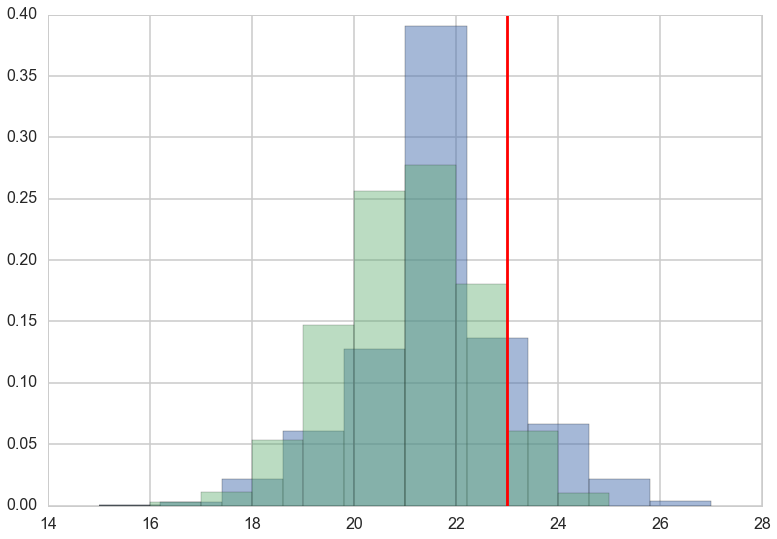

In [71]:
#your code here
allweighted=weighted_race_average(alladded)
alljoined = pd.merge(resudf[['state', 'winrepub', 'spread']], allweighted, on=["state"])

allpollprobs=aggregated_poll_model(allweighted)

alldistrib, allsimelec=simulate_election(allpollprobs, 10000)
plt.hist(alldistrib, alpha=0.5, normed=True);
plt.hist(weighted_distrib, alpha=0.4, normed=True)
plt.axvline(rwinresults, color='r')

#### 3.4 Now Compare the individual results, just like before

Make a plot similar to Question 1.8 to look at the individual results for the state races and comment on the results.

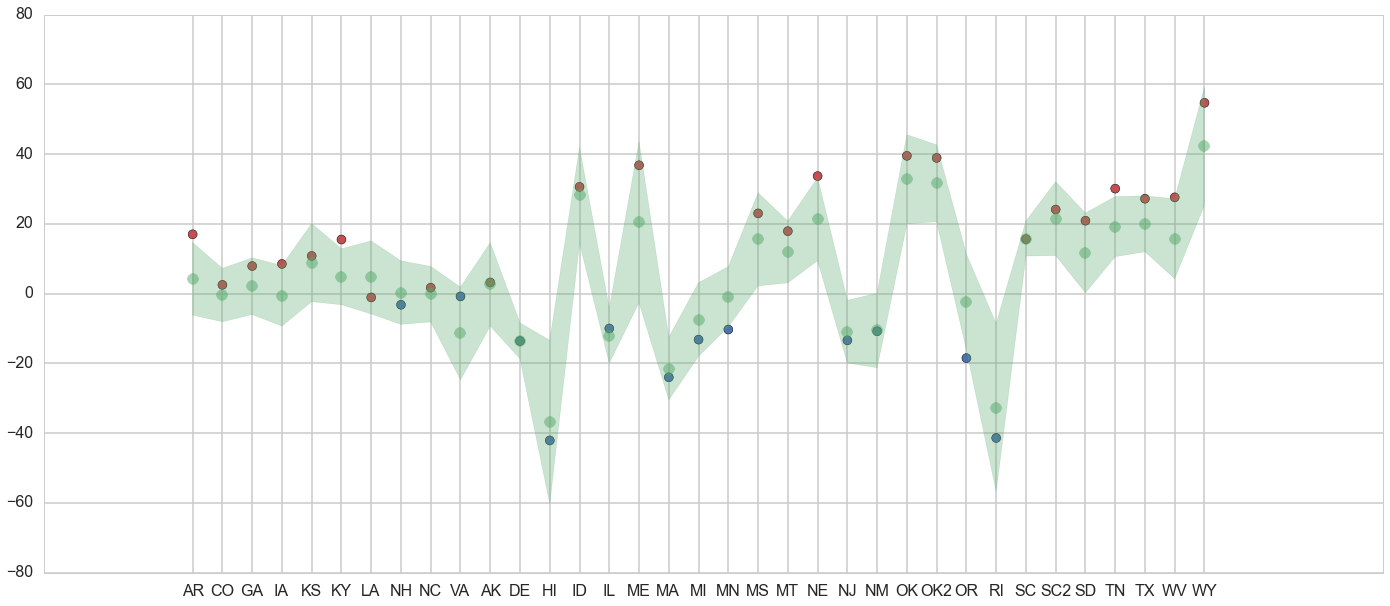

In [72]:
#your code here
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
rmap={0:c0, 1:c2}
plt.figure(figsize=(24,10))
plt.scatter(alljoined.index, alljoined.spread, label="actual-spread", s=80, c=[rmap[e] for e in alljoined.winrepub]);
plt.plot(alljoined.index, alljoined.poll_mean, 'o', label="estimated", alpha=0.5, color=c1);
plt.fill_between(alljoined.index, alljoined.poll_mean+1.96*alljoined.poll_std, alljoined.poll_mean-1.96*alljoined.poll_std, alpha=0.3, color=c1)
plt.xticks(alljoined.index, alljoined.state);

Are our polls doing much better? Can you point out some of the biases we managed to handle? What are some things that still need improvement?

*your answer here*

Overall the Republican-voting states seemed to get a fairer treatment (meaning closer predictions) after incorporating Incumbency and PVI, this led to much better predictions, i.e. as a closer tracking of the actual results. 

Give some thought as to how you might have used incumbency and partisan voting from previous years to have actually calculated the relative weights of the two features. (You dont have to hand this in, but think about it). 

And at this point you ought to read [this article](http://fivethirtyeight.com/features/how-the-fivethirtyeight-senate-forecast-model-works/) on how the [professionals](http://fivethirtyeight.com/contributors/nate-silver/) over at FiveThirtyEight do it. We've tried to give you a flavor of the calculations involved, and hope to see you soon make more sophisticated analyses.

## Q4. Write a newspaper article about the senate election

Imagine you just finished your analysis of the election and put your iPython notebook online on your blog. An editor of the New York Times calls you and invites you to write a 750 word (max.) article for them, including 3 charts. You are of course more than happy to do so, especially since you are eager to use your newly acquired knowledge about communication and story telling from this course. As a bonus your article will count towards your grade for this homework.

The article should:

- be max. 750 words long, including 3 charts
- be appropriate for the audience of the New York Times (NOT a technical audience)
- tell a story with a beginning, middle, and end
- have effective visualizations with clear labels, callouts, and captions that support your story
- clearly state your main question(s) and findings in the title and first paragraph
- establish a context for this work
- tell the reader why they should care
- describe your major insights from your analysis, supported by your charts
- surprise the reader with an insight they may not have expected
- end with a mention of potential future work

Use the analysis we have carried out in the notebook, and plots from here. Make sure your charts are properly labelled and clean. You might want to experiment with colors, chartjunk removal, seaborn settings, etc. You can drag plots to your desktop to save them as png files, but then make sure you copy them into the hw2 branch of your repository.

It should be written in markdown and saved as `article.md` in your hw2 branch. We will look for and grade a file of that name. Github will render markdown files directly in the github user interface.

You can write the article in a cell here, which is an easy way to use or use any editor with markdown or text support. Most have a specific language mode for markdown these days, but markdown is foremost plain text so even textedit or notepad would do. If you want something more wysiwyggy, Typora on the Mac is one of my favorites.

Here is an article on Markdown at github: https://guides.github.com/features/mastering-markdown/. Feel free to use any github extensions since we are going to be reading those on github.